<a href="https://colab.research.google.com/github/braydenteo/Biopal-report-1-Group-7/blob/main/Biopal_project_Group_7_report_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bone Health / Osteoporosis**
Group 7

Class: BMS 2M02

Group members:


*   Brayden Teo Tze Jun (S10269242J)
*   Kim Taehan (S10266950D)
*   Lim Jun Ming Denzil	(S10242235F)





# Links
**Google Colab:** https://colab.research.google.com/drive/1-_uH29mtnqm7bx99qpAcdqRQaHLmxK4Y?usp=sharing#scrollTo=XWS4d3CTavK5

**GitHub:**

### **Summary**

This report provides a comprehensive look at factors influencing osteoporosis risk among older obese adults, using NHANES data from multiple survey cycles. The dataset combines demographic details such as age, gender, and race/ethnicity with lifestyle variables like BMI, daily sedentary time, and fast-food meal frequency, as well as key biomarkers including serum vitamin D levels and bone mineral density at the lumbar spine and right arm. Descriptive statistics, frequency tables, histograms, boxplots, and normality tests were used to explore and understand the data. The categorical variables showed clear patterns, including a higher proportion of females, a majority of Non-Hispanic White participants, and substantial rates of current or past smoking — all factors linked to higher osteoporosis risk. Continuous variables showed expected trends: high BMI confirming the obese sample, moderate vitamin D levels with some deficiency risk, and bone mineral density levels that suggest general bone health but possible risk areas for some individuals. Annual trend plots added insight by showing how median values for bone density, vitamin D, BMI, and sedentary time changed over time. Bone density remained relatively stable, vitamin D showed a slight upward trend, BMI stayed high, and sedentary time fluctuated but tended to remain substantial. Together, these results highlight the importance of monitoring multiple lifestyle and biological factors when studying osteoporosis in this demographic. Overall, the report combines robust data exploration and clear visualisations to support meaningful insights for public health and research purposes.


# **1. Background and Rationale:**

**Rationale:**
Obesity was thought to protect against osteoporosis because of the higher mechanical loading. However, recent evidence suggests that obesity may impair vitamin D metabolism, which results in negative impact on bone health.

**Gap:** Many studies focus on BMI or vitamin D independently, but few examine their interaction. Inconsistent findings about whether obesity is protective or harmful to BMD when vitamin D status is accounted for.

**Use of NHANES and Project Extension:**

This study uses data cycles 2007-2018 from NHANES from the US population on their serum vitamin D, bone mineral density (BMD), obesity measures using BMI, dietary calcium intake, and lifestyle factors that include smoking and physical activity.
Previous studies only examined the relationship between vitamin D and bone health or obesity and bone health individually. Hence, in this project we chose to integrate cycles 2007-2018 of NHANES data to investigate the combined influence of serum vitamin D on BMD specifically in obese adults aged 50 and older. It also further explores how lifestyle factors such as smoking, physical activity, and calcium intake may modulate this relationship.
This approach fills gaps in the research by focusing on an aging obese subpopulation over a 12-year period, using standardized variables from NHANES and controlling for confounding variables that are often overlooked in smaller cohort studies.



# **2. Research Questions and Objectives**
**Research question:**

 How does serum vitamin D level influence bone mineral density in obese adults aged 50 and above in the U.S. population

**Justifying the novelty of the research question:** Obesity leads to higher BMD due to the constant mechanical loading. However, obesity is also linked to lower vitamin D levels which is very important in bone health. Since there are few studies that have explored how obesity’s negative effect on vitamin D impacts BMD in people aged 50+, especially using large, representative data. This project fills that gap by analysing 12 years of NHANES data focusing on obese adults aged 50 and above.

**How does it build upon or fills gaps in existing studies:**

 This project builds upon previous research by using integrated NHANES data from 2007–2018, allowing for a larger and more representative sample of the U.S. population. It specifically focuses on whether low vitamin D levels in obese older adults, still predict poorer bone health or is this masked by their obesity, as obesity is known to have a positive effect on BMD.
By examining multiple variables like vitamin D, BMD, BMI, dietary habits, smoking status, and physical activity altogether, we can address how multiple lifestyle and biological factors interact. This may help offer better insights into targeted prevention strategies for osteoporosis in obese individuals that are aged 50 and above.




### ✅ SMART Objective 1

**Specific:**  
To determine the relationship between **BMI** and **lumbar spine bone mineral density** in obese adults aged 50 and above.

**Measurable:**  
By calculating descriptive statistics, normality tests, and visualizing distributions for BMI and BMD, then exploring their correlation.

**Achievable:**  
Using merged NHANES data (2007–2018) filtered for obese older adults.

**Relevant:**  
Findings can clarify how body weight affects bone health in this target group.

**Time-bound:**  
To be completed within the allocated ~6-week project timeline.


### ✅ SMART Objective 2

**Specific:**  
To assess the prevalence of **Vitamin D deficiency** in obese adults aged 50+ and its association with bone mineral density.

**Measurable:**  
By calculating the percentage of participants with serum 25-hydroxyvitamin D below 50 nmol/L, comparing means and distribution plots with BMD.

**Achievable:**  
Using available NHANES cycles with Vitamin D and BMD data.

**Relevant:**  
Addresses the role of vitamin D status in osteoporosis risk.

**Time-bound:**  
All analysis steps to be done within 6 weeks.


### ✅ SMART Objective 3

**Specific:**  
To evaluate the impact of **daily sedentary time** on bone health among obese older adults.

**Measurable:**  
By describing sedentary time, testing its normality, visualizing with histograms & boxplots, and exploring links to BMD.

**Achievable:**  
Data is available in NHANES Physical Activity Questionnaire (PAQ) cycles.

**Relevant:**  
Sedentary behavior is an important modifiable risk factor for osteoporosis.

**Time-bound:**  
Results to be produced and visualized in the project timeframe.


In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

# **3. Variables and Data Sources** denzil

## **3.1 Merging of datasets**

Merging dataset to create a unified dataset allowing us to perform cross-variable analyses like how vitamin D relates to bone density, accounting for age and BMI.

In [ ]:
import pandas as pd
import numpy as np

# Define years and NHANES cycles for 2007–2018
years = ["2007", "2009", "2011", "2013", "2015", "2017"]
cycles = ["E", "F", "G", "H", "I", "J"]

def load_data(file_prefix, columns):
    """Helper to load and concatenate data across cycles, skipping missing files or columns."""
    df_list = []
    for y, c in zip(years, cycles):
        url = f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/{file_prefix}_{c}.xpt"
        try:
            df_cycle = pd.read_sas(url)
            existing_cols = [col for col in columns if col in df_cycle.columns]
            if len(existing_cols) == 0:
                print(f"Warning: No requested columns found in {file_prefix}_{c}, skipping.")
                continue
            df_list.append(df_cycle[existing_cols])
        except Exception as e:
            print(f"Could not load {url}: {e}")
    if df_list:
        return pd.concat(df_list, ignore_index=True)
    else:
        return pd.DataFrame(columns=columns)

# Load datasets
print("Loading Demographics...")
df_demo = load_data("DEMO", ["SEQN", "RIDAGEYR", "RIAGENDR", "RIDRETH1"])
print(f"DEMO shape: {df_demo.shape}")

print("Loading BMI...")
df_bmi = load_data("BMX", ["SEQN", "BMXBMI"])
print(f"BMX shape: {df_bmi.shape}")

print("Loading Vitamin D...")
df_vitd = load_data("VID", ["SEQN", "LBXVIDMS"])
print(f"VID shape: {df_vitd.shape}")

print("Loading Bone Density...")
df_bmd = load_data("DXX", ["SEQN", "DXXLSBMD", "DXXRABMD"])
print(f"DXX shape: {df_bmd.shape}")

print("Loading Smoking...")
df_smoking = load_data("SMQ", ["SEQN", "SMQ020", "SMQ040"])
print(f"SMQ shape: {df_smoking.shape}")

print("Loading Physical Activity...")
df_physical = load_data("PAQ", ["SEQN", "PAD680"])
print(f"PAQ shape: {df_physical.shape}")

print("Loading Dietary habits...")
df_calcium = load_data("DBD", ["SEQN", "DBD900"])
print(f"DBD shape: {df_calcium.shape}")

print("Loading Osteoporosis Questionnaire...")
df_osq = load_data("OSQ", ["SEQN", "OSQ060"])
print(f"OSQ shape: {df_osq.shape}")

print("Loading Prescription Medications...")
df_rx = load_data("RXQ_RX", ["SEQN", "RXDDRUG", "RXDGEN"])
print(f"RXQ_RX shape: {df_rx.shape}")

# Determine which column to use for drug name matching
drug_col = None
for col in ["RXDDRUG", "RXDGEN"]:
    if col in df_rx.columns:
        drug_col = col
        break

if drug_col is None:
    print("Warning: No drug name column found in RXQ_RX dataset, skipping medication filtering.")
    osteomed_seqn = []
else:
    # Lowercase for matching
    df_rx[drug_col] = df_rx[drug_col].astype(str).str.lower()

    osteoporosis_meds = [
        "alendronate", "risedronate", "ibandronate", "zoledronic",
        "teriparatide", "denosumab", "calcitonin", "raloxifene"
    ]

    # Flag rows where medication matches any osteoporosis med
    df_rx["OnOsteoMed"] = df_rx[drug_col].apply(lambda x: any(med in x for med in osteoporosis_meds))
    osteomed_seqn = df_rx.loc[df_rx["OnOsteoMed"], "SEQN"].unique()
    print(f"Participants on osteoporosis meds: {len(osteomed_seqn)}")

# Merge all datasets on SEQN (except RXQ_RX since used only for filtering)
print("Merging datasets...")
df = df_demo.merge(df_bmi, on="SEQN", how="left") \
            .merge(df_vitd, on="SEQN", how="left") \
            .merge(df_bmd, on="SEQN", how="left") \
            .merge(df_smoking, on="SEQN", how="left") \
            .merge(df_physical, on="SEQN", how="left") \
            .merge(df_calcium, on="SEQN", how="left") \
            .merge(df_osq, on="SEQN", how="left")  # <-- merge OSQ060 here

print(f"Final merged dataset shape: {df.shape}")

# Filter for obese adults aged 50+ who are NOT on osteoporosis meds
df_filtered = df[(df["RIDAGEYR"] >= 50) & (df["BMXBMI"] >= 30)].copy()
print(f"Before excluding meds, filtered shape: {df_filtered.shape}")

if len(osteomed_seqn) > 0:
    df_filtered = df_filtered[~df_filtered["SEQN"].isin(osteomed_seqn)]

print(f"After excluding osteoporosis meds, filtered shape: {df_filtered.shape}")
print(df_filtered.head())



Loading Demographics...
DEMO shape: (59842, 4)
Loading BMI...
BMX shape: (57414, 2)
Loading Vitamin D...
VID shape: (55051, 2)
Loading Bone Density...
Could not load https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2007/DataFiles/DXX_E.xpt: HTTP Error 404: Not Found
Could not load https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2009/DataFiles/DXX_F.xpt: HTTP Error 404: Not Found
DXX shape: (22619, 3)
Loading Smoking...
SMQ shape: (42356, 3)
Loading Physical Activity...
PAQ shape: (52832, 2)
Loading Dietary habits...
Could not load https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2007/DataFiles/DBD_E.xpt: HTTP Error 404: Not Found
Could not load https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2009/DataFiles/DBD_F.xpt: HTTP Error 404: Not Found
Could not load https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2011/DataFiles/DBD_G.xpt: HTTP Error 404: Not Found
Could not load https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2013/DataFiles/DBD_H.xpt: HTTP Error 404: Not Found
Could not load https://wwwn.cdc.gov/N

**Function:** This script downloads, merges, and filters NHANES data from 2007–2018 across multiple cycles to create a cleaned dataset specifically focused on obese adults aged 50 and above who are not taking osteoporosis medications.

**Rationale:** This code supports the project’s research question by constructing a high-quality subset of NHANES data tailored to a specific population: obese older adults. Since these individuals may have both increased bone loading  and reduced vitamin D, excluding those on osteoporosis medications ensures a more unbiased investigation into natural relationships between serum vitamin D and bone mineral density. Using a 12-year period ensures sufficient sample size and robustness for statistical analysis.

## **3.2 Variables**

**Dependent Continuous Variables**

| Variable Name | Units  | NHANES Datasets | Descriptions                  | Clinical Significance                                                                                     |
|---------------|--------|------------------|--------------------------------|------------------------------------------------------------------------------------------------------------|
| DXXLSBMD      | g/cm²  | DXXAG_G – DXXAG_J | Lumbar Spine Bone Mineral Density | Direct measure of osteoporosis diagnosis and bone strength.                                                |
| DXXRABMD      | g/cm²  | DXX_G – DXX_J     | Right Arm Bone Mineral Density   | While the spine and hip are standard sites for diagnosing osteoporosis, right arm BMD can help explore general bone health and peripheral bone density, offering a broader picture beyond fracture-prone areas. |


**Independent Continuous Variables**

| Variable Name | Units        | NHANES Datasets | Descriptions                           | Clinical Significance                                                                                                      |
|---------------|--------------|------------------|----------------------------------------|----------------------------------------------------------------------------------------------------------------------------|
| BMXBMI        | Kg/m²        | BMX_E – BMX_J    | Body mass index                        | Low BMI is linked to lower bone mass and higher fracture risk. <18.5 = Underweight, 18.5–24.9 = Normal, 25–29.9 = Overweight, ≥30 = Obese |
| LBXVIDMS      | nmol/L       | VID_E – VID_J    | Serum 25-hydroxyvitamin D concentration | Essential for calcium absorption; deficiency is linked to osteoporosis.                                                     |
| PAD680        | Minutes/day  | PAQ_E – PAQ_J    | Time spent sitting on a typical day    | Excessive sedentary behavior may contribute to bone loss due to low mechanical load.                                        |
| DBD900        | Number of meals | DBQ_E – DBQ_J | # of meals from fast food or pizza place | High fast-food consumption may be linked to lower nutrient quality, inadequate calcium intake, and poor bone health indirectly. |
| RIDAGEYR      | Years        | DEMO_E – DEMO_J  | Participant’s age in years             | Age is a major risk factor for osteoporosis; bone density naturally declines with age.                                      |


**Independent Categorical Variables**

| Variable Name | Codes | NHANES Datasets | Descriptions | Clinical Significance |
|---------------|-------|------------------|---------------|-----------------------|
| RIAGENDR | 1 = Male<br>2 = Female | DEMO_E – DEMO_J | Gender of participants | Females, especially postmenopausal, have higher osteoporosis risk. |
| RIDRETH1 | 1 = Mexican American<br>2 = Other Hispanic<br>3 = Non-Hispanic White<br>4 = Non-Hispanic Black<br>5 = Other races – Including Multi-Racial | DEMO_E – DEMO_J | Self-reported race/ethnicity | Ethnic differences affect baseline BMD and fracture risk. |
| SMQ020 | 1 = Yes<br>2 = No<br>7 = Refused<br>9 = Don’t know | SMQ_E – SMQ_J | Smoked at least 100 cigarettes in life | Past smoking history remains a risk factor for decreased BMD. |
| SMQ040 | 1 = Everyday<br>2 = Some days<br>3 = Not at all<br>7 = Refused<br>9 = Don’t know | SMQ_E – SMQ_J | Current smoking status | Smoking accelerates bone loss and increases osteoporosis risk. |


**Mapping of Biomarkers**

In [ ]:


import pandas as pd

# ✅ Assuming you have `df_filtered` as your working DataFrame

# ✅ Make flags for categories
df_filtered["VITD_DEFICIENT"] = df_filtered["LBXVIDMS"].apply(lambda x: 1 if x < 50 else (0 if pd.notnull(x) else np.nan))
df_filtered["LSBMD_LOW"] = df_filtered["DXXLSBMD"].apply(lambda x: 1 if x < 0.9 else (0 if pd.notnull(x) else np.nan))
df_filtered["RABMD_LOW"] = df_filtered["DXXRABMD"].apply(lambda x: 1 if x < 0.6 else (0 if pd.notnull(x) else np.nan))

# ✅ Counts & %
total_vitd = df_filtered["VITD_DEFICIENT"].notna().sum()
total_lsbmd = df_filtered["LSBMD_LOW"].notna().sum()
total_rabmd = df_filtered["RABMD_LOW"].notna().sum()

vitd_def = df_filtered["VITD_DEFICIENT"].sum()
vitd_suf = total_vitd - vitd_def

lsbmd_low = df_filtered["LSBMD_LOW"].sum()
lsbmd_norm = total_lsbmd - lsbmd_low

rabmd_low = df_filtered["RABMD_LOW"].sum()
rabmd_norm = total_rabmd - rabmd_low

# ✅ Put in DataFrame
mapping_df = pd.DataFrame({
    "Biomarker Category": [
        "Vitamin D Status", "Vitamin D Status",
        "Lumbar Spine BMD Status", "Lumbar Spine BMD Status",
        "Right Arm BMD Status", "Right Arm BMD Status"
    ],
    "Category": [
        "Deficient (< 50 nmol/L)", "Sufficient (≥ 50 nmol/L)",
        "Low (< 0.9 g/cm²)", "Normal (≥ 0.9 g/cm²)",
        "Low (< 0.6 g/cm²)", "Normal (≥ 0.6 g/cm²)"
    ],
    "Count (n)": [
        int(vitd_def), int(vitd_suf),
        int(lsbmd_low), int(lsbmd_norm),
        int(rabmd_low), int(rabmd_norm)
    ],
    "Percentage (%)": [
        f"{(vitd_def/total_vitd)*100:.2f}%",
        f"{(vitd_suf/total_vitd)*100:.2f}%",
        f"{(lsbmd_low/total_lsbmd)*100:.2f}%",
        f"{(lsbmd_norm/total_lsbmd)*100:.2f}%",
        f"{(rabmd_low/total_rabmd)*100:.2f}%",
        f"{(rabmd_norm/total_rabmd)*100:.2f}%"
    ]
})

# ✅ Display
from IPython.display import display
display(mapping_df)


Biomarker Category                  Category  Count (n) Percentage (%)
0         Vitamin D Status   Deficient (< 50 nmol/L)       1851         31.05%
1         Vitamin D Status  Sufficient (≥ 50 nmol/L)       4111         68.95%
2  Lumbar Spine BMD Status         Low (< 0.9 g/cm²)        277         23.70%
3  Lumbar Spine BMD Status      Normal (≥ 0.9 g/cm²)        892         76.30%
4     Right Arm BMD Status         Low (< 0.6 g/cm²)         30          2.52%
5     Right Arm BMD Status      Normal (≥ 0.6 g/cm²)       1160         97.48%

## **3.3 Overview of Dataset**

### **3.3.1 Filtering datasets**









### **Filtering Criteria:**

Adults aged 50 years and above

BMI ≥ 30 (obese)

Exclusion: Participants on osteoporosis medications were removed using SEQN filtering.

Handling Missing Data:

The code used selective column merging (existing_cols) to gracefully handle missing columns in specific cycles.

If no requested variables were available for a cycle, that file was skipped.

Merging used how='left', which retains missing data as NaN rather than dropping rows prematurely.

No explicit imputation was done in this stage; missing values were left in place for downstream handling or filtering.



Could not load https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2007/DataFiles/DXX_E.xpt: HTTP Error 404: Not Found
Could not load https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2009/DataFiles/DXX_F.xpt: HTTP Error 404: Not Found
Could not load https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2007/DataFiles/DBD_E.xpt: HTTP Error 404: Not Found
Could not load https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2009/DataFiles/DBD_F.xpt: HTTP Error 404: Not Found
Could not load https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2011/DataFiles/DBD_G.xpt: HTTP Error 404: Not Found
Could not load https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2013/DataFiles/DBD_H.xpt: HTTP Error 404: Not Found
Could not load https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2015/DataFiles/DBD_I.xpt: HTTP Error 404: Not Found
Could not load https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/DBD_J.xpt: HTTP Error 404: Not Found

Some datasets are not available for every NHANES cycle

### **Before** filtering people on osteoporosis medications

In [ ]:

# Define the categorical columns based on your dataset
cat_cols = ["RIAGENDR", "RIDRETH1", "SMQ020", "SMQ040"]

# Define the numerical columns
num_cols = ["RIDAGEYR", "BMXBMI", "LBXVIDMS", "DXXLSBMD", "DXXRABMD", "PAD680", "DBD900"]

print("\nSize of dataset: ", "Columns: ", len(df.columns), "Rows: ", len(df), "\n")

display(df.head())

# Summarize only the numerical columns
display(df[num_cols].describe())

# Explore missing data
missing_data = df.isnull().sum()
print("\nMissing data")
print(missing_data)



Size of dataset:  Columns:  13 Rows:  59842 



SEQN  RIDAGEYR  RIAGENDR  RIDRETH1  BMXBMI  LBXVIDMS  DXXLSBMD  \
0  41475.0      62.0       2.0       5.0   58.04      58.8       NaN   
1  41476.0       6.0       2.0       5.0   15.18      80.9       NaN   
2  41477.0      71.0       1.0       3.0   30.05      81.8       NaN   
3  41478.0       1.0       2.0       3.0     NaN       NaN       NaN   
4  41479.0      52.0       1.0       1.0   27.56      78.4       NaN   

   DXXRABMD  SMQ020  SMQ040  PAD680 DBD900  OSQ060  
0       NaN     2.0     NaN   720.0    NaN     2.0  
1       NaN     NaN     NaN     NaN    NaN     NaN  
2       NaN     1.0     3.0   240.0    NaN     2.0  
3       NaN     NaN     NaN     NaN    NaN     NaN  
4       NaN     2.0     NaN   180.0    NaN     2.0

RIDAGEYR        BMXBMI      LBXVIDMS      DXXLSBMD      DXXRABMD  \
count  5.984200e+04  52691.000000  47278.000000  18772.000000  19035.000000   
mean   3.242878e+01     25.864398     64.288153      0.970607      0.742837   
std    2.496001e+01      7.878070     25.828935      0.189911      0.128976   
min    5.397605e-79     11.500000      5.410000      0.441000      0.302000   
25%    1.000000e+01     19.900000     46.700000      0.849000      0.661000   
50%    2.800000e+01     25.100000     62.100000      0.981000      0.743000   
75%    5.400000e+01     30.400000     78.300000      1.094000      0.832000   
max    8.000000e+01     86.200000    422.000000      2.477000      1.494000   

             PAD680  
count  4.129400e+04  
mean   4.143793e+02  
std    6.827364e+02  
min    5.397605e-79  
25%    1.800000e+02  
50%    3.600000e+02  
75%    4.800000e+02  
max    9.999000e+03


Missing data
SEQN            0
RIDAGEYR        0
RIAGENDR        0
RIDRETH1        0
BMXBMI       7151
LBXVIDMS    12564
DXXLSBMD    41070
DXXRABMD    40807
SMQ020      24169
SMQ040      44445
PAD680      18548
DBD900      59842
OSQ060      40806
dtype: int64


### **After filtering people on osteoporosis medications**

In [ ]:
print("\nSize of filtered dataset: ", "Columns: ", len(df_filtered.columns), "Rows: ", len(df_filtered), "\n")

display(df_filtered.head())

display(df_filtered[num_cols].describe())

missing_data = df_filtered.isnull().sum()
print("\nMissing data")
print(missing_data)



Size of filtered dataset:  Columns:  16 Rows:  6391 



SEQN  RIDAGEYR  RIAGENDR  RIDRETH1  BMXBMI  LBXVIDMS  DXXLSBMD  \
0   41475.0      62.0       2.0       5.0   58.04      58.8       NaN   
2   41477.0      71.0       1.0       3.0   30.05      81.8       NaN   
7   41482.0      64.0       1.0       1.0   33.64      61.9       NaN   
8   41483.0      66.0       1.0       4.0   44.06      53.3       NaN   
11  41486.0      61.0       2.0       1.0   31.21      51.1       NaN   

    DXXRABMD  SMQ020  SMQ040  PAD680 DBD900  OSQ060  VITD_DEFICIENT  \
0        NaN     2.0     NaN   720.0    NaN     2.0             0.0   
2        NaN     1.0     3.0   240.0    NaN     2.0             0.0   
7        NaN     1.0     3.0   180.0    NaN     2.0             0.0   
8        NaN     2.0     NaN    60.0    NaN     2.0             0.0   
11       NaN     2.0     NaN   480.0    NaN     2.0             0.0   

    LSBMD_LOW  RABMD_LOW  
0         NaN        NaN  
2         NaN        NaN  
7         NaN        NaN  
8         NaN        NaN  
11        NaN        NaN

RIDAGEYR       BMXBMI     LBXVIDMS     DXXLSBMD     DXXRABMD  \
count  6391.000000  6391.000000  5962.000000  1169.000000  1190.000000   
mean     63.748396    35.686237    66.035067     1.023344     0.782793   
std       8.969584     5.600507    29.236538     0.168467     0.112574   
min      50.000000    30.000000     7.040000     0.595000     0.480000   
25%      56.000000    31.700000    45.300000     0.904000     0.699250   
50%      63.000000    34.000000    62.700000     1.007000     0.773500   
75%      71.000000    37.845000    82.400000     1.131000     0.858000   
max      80.000000    84.400000   422.000000     1.696000     1.270000   

             PAD680  
count  6.384000e+03  
mean   4.332533e+02  
std    7.590204e+02  
min    5.397605e-79  
25%    2.400000e+02  
50%    3.600000e+02  
75%    4.800000e+02  
max    9.999000e+03


Missing data
SEQN                 0
RIDAGEYR             0
RIAGENDR             0
RIDRETH1             0
BMXBMI               0
LBXVIDMS           429
DXXLSBMD          5222
DXXRABMD          5201
SMQ020               0
SMQ040            3280
PAD680               7
DBD900            6391
OSQ060            2016
VITD_DEFICIENT     429
LSBMD_LOW         5222
RABMD_LOW         5201
dtype: int64


**Function:** This code performs basic diagnostics on the cleaned dataset df_filtered:

1. Prints the size of the filtered dataset — number of columns and rows.

2. Displays the first few rows of the dataset (head()) for a quick preview.

3. Displays summary statistics (describe()) for the numerical variables in num_cols — including mean, standard deviation, min, max, and quartiles.

4. Calculates and prints missing values for all columns — using .isnull().sum() to identify data quality issues.

**Rationale:** We filtered out people on osteoporosis medications, because these drugs directly affect BMD, which is a key outcome in our study. Including them would introduce a confounding variable as their BMD might improve or stabilize because of the medication, and not because of their vitamin D levels, BMI status, or other lifestyle factors.

### **Missing Data**

In [ ]:
import pandas as pd

# ✅ Variables of interest
variables = ["RIDAGEYR", "BMXBMI", "LBXVIDMS", "DXXLSBMD", "DXXRABMD", "PAD680", "DBD900",
             "RIAGENDR", "RIDRETH1", "SMQ020", "SMQ040"]

# ✅ Calculate missing + valid per variable
missing_info = []

for col in variables:
    valid = df_filtered[col].notna().sum()
    missing = df_filtered[col].isna().sum()
    total = valid + missing  # Now variable-specific
    missing_pct = (missing / total) * 100 if total > 0 else 0

    missing_info.append({
        "Variable": col,
        "Total Records": total,
        "Valid (Non-Missing)": valid,
        "Missing": missing,
        "Missing (%)": f"{missing_pct:.2f}%"
    })

# ✅ Create DataFrame
missing_df = pd.DataFrame(missing_info)

# ✅ Display
from IPython.display import display
display(missing_df)


Variable  Total Records  Valid (Non-Missing)  Missing Missing (%)
0   RIDAGEYR           6391                 6391        0       0.00%
1     BMXBMI           6391                 6391        0       0.00%
2   LBXVIDMS           6391                 5962      429       6.71%
3   DXXLSBMD           6391                 1169     5222      81.71%
4   DXXRABMD           6391                 1190     5201      81.38%
5     PAD680           6391                 6384        7       0.11%
6     DBD900           6391                    0     6391     100.00%
7   RIAGENDR           6391                 6391        0       0.00%
8   RIDRETH1           6391                 6391        0       0.00%
9     SMQ020           6391                 6391        0       0.00%
10    SMQ040           6391                 3111     3280      51.32%

**Missing Data Handling:**  
Missing data were handled listwise for descriptive statistics, normality checks, and visualizations. Implausible values (e.g., extreme sedentary time) were treated as missing and excluded. No advanced imputation was performed except for optional mean imputation in the correlation heatmap.  


### **3.3.2 Correlation heatmap** denzil

RIDAGEYR    0.000000
BMXBMI      0.119498
LBXVIDMS    0.209953
DXXLSBMD    0.686307
DXXRABMD    0.681912
PAD680      0.309950
DBD900      1.000000
dtype: float64


/tmp/ipython-input-36-2364126133.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(df_imputed[col].mean(), inplace=True)
/tmp/ipython-input-36-2364126133.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_imputed[col].fillna(df_imputed[col].mean(), inplace=True)


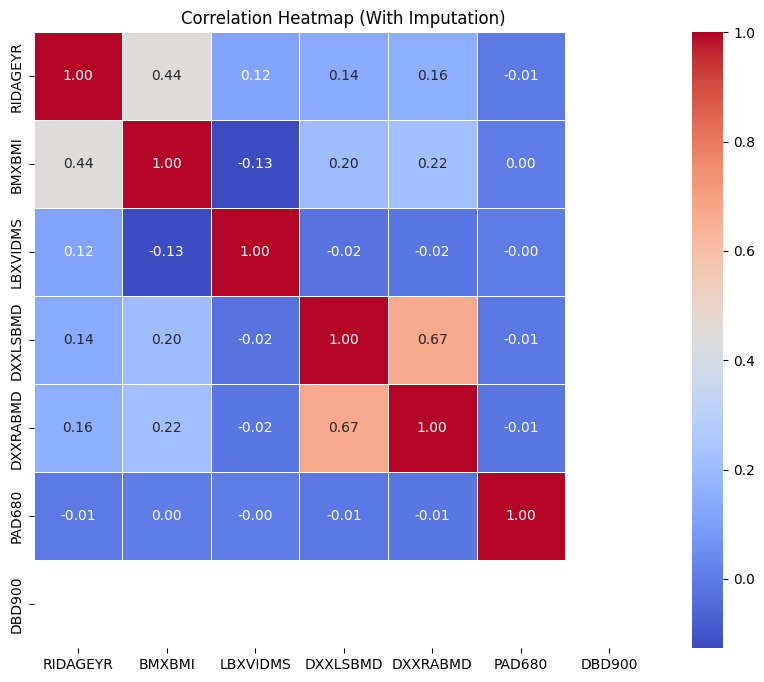

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ["RIDAGEYR", "BMXBMI", "LBXVIDMS", "DXXLSBMD", "DXXRABMD", "PAD680", "DBD900"]

# Optional: Check missingness
print(df[num_cols].isna().mean())

# Impute missing values with mean
df_imputed = df[num_cols].copy()
for col in num_cols:
    df_imputed[col].fillna(df_imputed[col].mean(), inplace=True)

# Compute correlation matrix
corr_matrix = df_imputed.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (With Imputation)")
plt.show()



**Function:** This code creates a correlation heatmap

**Rationale:** To visualize the relationships between independent and dependent variables, while avoiding issues caused by missing data.

# **Sample size** denzil

In [ ]:
import pandas as pd

# Create a summary table for sample size
sample_summary = pd.DataFrame({
    "Description": ["Number of participants", "Number of variables"],
    "Count": [df_filtered.shape[0], df_filtered.shape[1]]
})

# Display as a table
print("🔹 Sample Size Summary:")
display(sample_summary)


🔹 Sample Size Summary:


Description  Count
0  Number of participants   6391
1     Number of variables     16

# **4. Dataset exploration**


In [ ]:
print("✅ Age filter check:")
print(df_filtered["RIDAGEYR"].min())  # Should be >= 50

print("✅ BMI filter check:")
print(df_filtered["BMXBMI"].min())    # Should be >= 30


✅ Age filter check:
50.0
✅ BMI filter check:
30.0


## **Setup & Mapping**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot

# -------------------------------
# Define numerical & categorical columns
# -------------------------------
num_cols = ["RIDAGEYR", "BMXBMI", "LBXVIDMS", "DXXLSBMD", "DXXRABMD", "PAD680", "DBD900"]
cat_cols = ["RIAGENDR", "RIDRETH1", "SMQ020", "SMQ040"]

# -------------------------------
# Replace invalid sedentary time values
# -------------------------------
if "PAD680" in df_filtered.columns:
    df_filtered["PAD680"] = df_filtered["PAD680"].where(
        (df_filtered["PAD680"] >= 0) & (df_filtered["PAD680"] <= 1440),
        np.nan
    )

# -------------------------------
# Mapping dictionaries for categorical variables
# -------------------------------
gender_map = {1: "Male", 2: "Female"}
race_map = {
    1: "Mexican American",
    2: "Other Hispanic",
    3: "Non-Hispanic White",
    4: "Non-Hispanic Black",
    5: "Other Race"
}
smoking_map = {1: "Every day", 2: "Some days", 3: "Not at all"}
smq040_map = {1: "Yes", 2: "No"}

# -------------------------------
# Apply mappings
# -------------------------------
df_filtered["RIAGENDR_label"] = df_filtered["RIAGENDR"].map(gender_map)
df_filtered["RIDRETH1_label"] = df_filtered["RIDRETH1"].map(race_map)
df_filtered["SMQ020_label"] = df_filtered["SMQ020"].map(smoking_map)
df_filtered["SMQ040_label"] = df_filtered["SMQ040"].map(smq040_map)

# -------------------------------
# Labels for bar charts
# -------------------------------
cat_label_cols = ["RIAGENDR_label", "RIDRETH1_label", "SMQ020_label", "SMQ040_label"]


📌 Purpose of This Code Block

This code block prepares and cleans the dataset by:
- Defining numerical and categorical variables,
- Handling invalid values,
- Mapping categorical codes to clear text labels,
- Creating labeled columns for easier interpretation and for use in bar charts.


## **4.1 Descriptive statistics**

In [ ]:
# -------------------------------
# Descriptive stats for continuous variables
# -------------------------------
print("🔹 Descriptive Statistics:\n")
desc_stats = df_filtered[num_cols].agg(['mean', 'median', 'std', 'min', 'max'])
print(desc_stats)


🔹 Descriptive Statistics:

         RIDAGEYR     BMXBMI    LBXVIDMS  DXXLSBMD  DXXRABMD        PAD680  \
mean    63.748396  35.686237   66.035067  1.023344  0.782793  3.774895e+02   
median  63.000000  34.000000   62.700000  1.007000  0.773500  3.600000e+02   
std      8.969584   5.600507   29.236538  0.168467  0.112574  2.070139e+02   
min     50.000000  30.000000    7.040000  0.595000  0.480000  5.397605e-79   
max     80.000000  84.400000  422.000000  1.696000  1.270000  1.380000e+03   

        DBD900  
mean       NaN  
median     NaN  
std        NaN  
min        NaN  
max        NaN  


/usr/local/lib/python3.11/dist-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


## **4.1 Intepretation of Descriptive Statistics**

| Statistic | RIDAGEYR | BMXBMI | LBXVIDMS | DXXLSBMD | DXXRABMD | PAD680 |
|-----------|----------|--------|----------|----------|----------|--------|
| **Mean**  | 63.75    | 35.69  | 66.04    | 1.023    | 0.783    | 377.49 |
| **Median**| 63.00    | 34.00  | 62.70    | 1.007    | 0.774    | 360.00 |
| **Std**   | 8.97     | 5.60   | 29.24    | 0.168    | 0.113    | 207.01 |
| **Min**   | 50.00    | 30.00  | 7.04     | 0.595    | 0.480    | ~0.00  |
| **Max**   | 80.00    | 84.40  | 422.00   | 1.696    | 1.270    | 1380.00 |

**Age (RIDAGEYR)**

The participants are older adults, with a mean age of approximately 64 years (range: 50–80 years). This age range is appropriate for studying osteoporosis risk, as bone mineral density generally declines with increasing age.

**Body Mass Index (BMXBMI)**

The mean BMI is about 35.7 kg/m², indicating that most participants fall within the obese category (BMI ≥ 30). While higher BMI can sometimes protect bone density by increasing mechanical loading, excessive obesity may be linked to other health risks.

**Vitamin D (LBXVIDMS)**

The average serum 25-hydroxyvitamin D concentration is around 66 nmol/L, which sits near the lower end of the sufficient range for bone health. Deficiency in vitamin D can contribute to reduced calcium absorption and lower bone mineral density.

**Lumbar Spine BMD (DXXLSBMD) & Right Arm BMD (DXXRABMD)**

The mean lumbar spine BMD is about 1.02 g/cm² and the mean right arm BMD is about 0.78 g/cm². These measures indicate general bone density status in the spine and peripheral sites. Lower BMD values can signal osteopenia or osteoporosis, but clinical interpretation should be supported with T-scores and compared to reference values.

**Sedentary Time (PAD680)**

Participants reported an average of approximately 377 minutes per day of sedentary time, equivalent to about 6.3 hours daily. The maximum value suggests that some participants may spend nearly the entire day sitting (up to 1,380 minutes per day, or 23 hours). High sedentary time can contribute to lower bone mineral density due to reduced mechanical loading on the skeleton.


**4.2 Frequency tables for Categorical Variables**

In [ ]:
# -------------------------------
# Frequency tables for categorical variables
# -------------------------------
print("\n🔹 Frequency Tables for Categorical Variables:\n")
for col in cat_label_cols:
    print(f"{col} value counts:")
    print(df_filtered[col].value_counts(dropna=False))
    print()



🔹 Frequency Tables for Categorical Variables:

RIAGENDR_label value counts:
RIAGENDR_label
Female    3544
Male      2847
Name: count, dtype: int64

RIDRETH1_label value counts:
RIDRETH1_label
Non-Hispanic White    2702
Non-Hispanic Black    1718
Mexican American       980
Other Hispanic         709
Other Race             282
Name: count, dtype: int64

SMQ020_label value counts:
SMQ020_label
Some days    3276
Every day    3111
NaN             4
Name: count, dtype: int64

SMQ040_label value counts:
SMQ040_label
NaN    5567
Yes     686
No      138
Name: count, dtype: int64



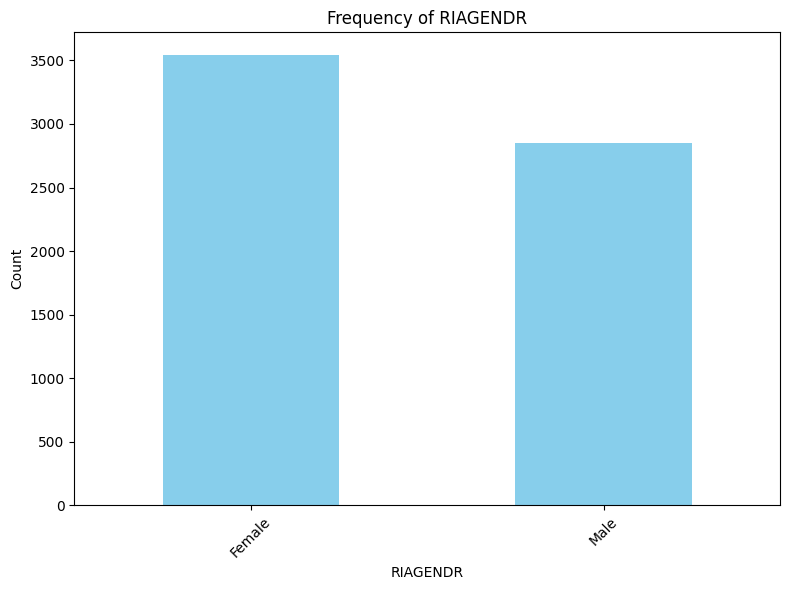

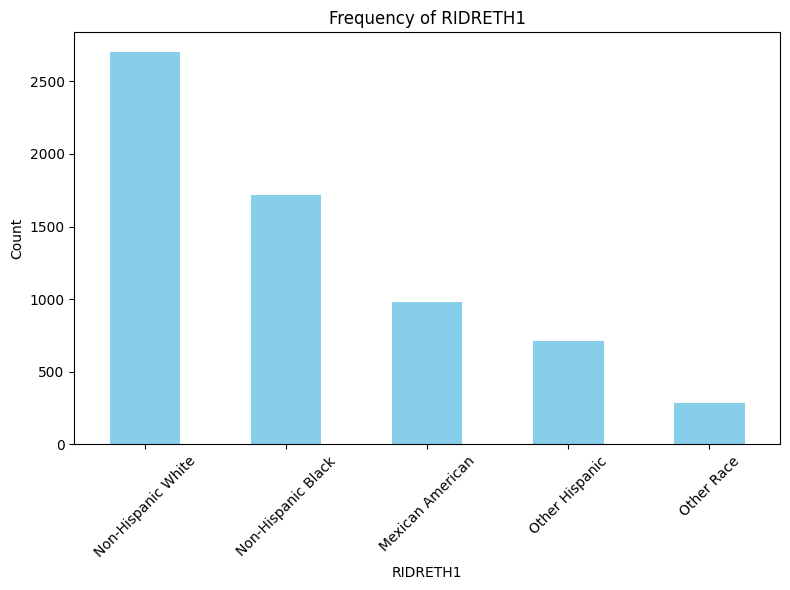

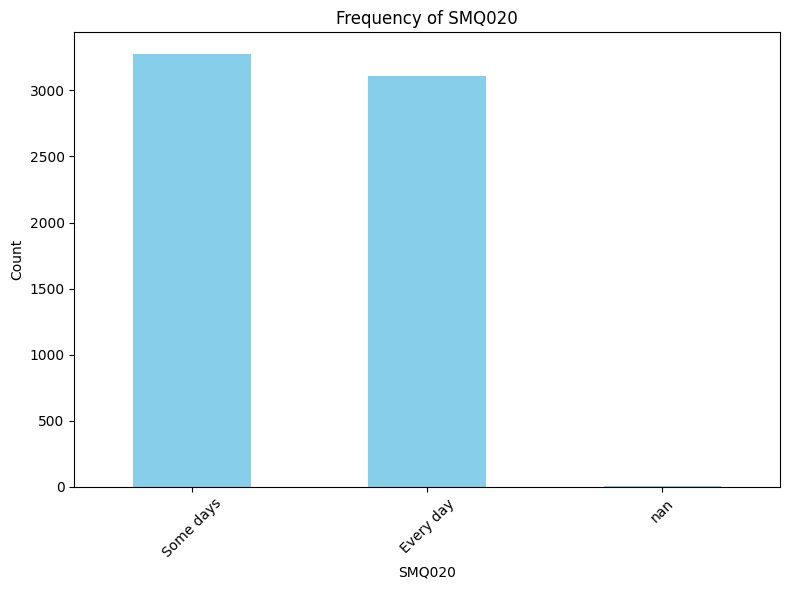

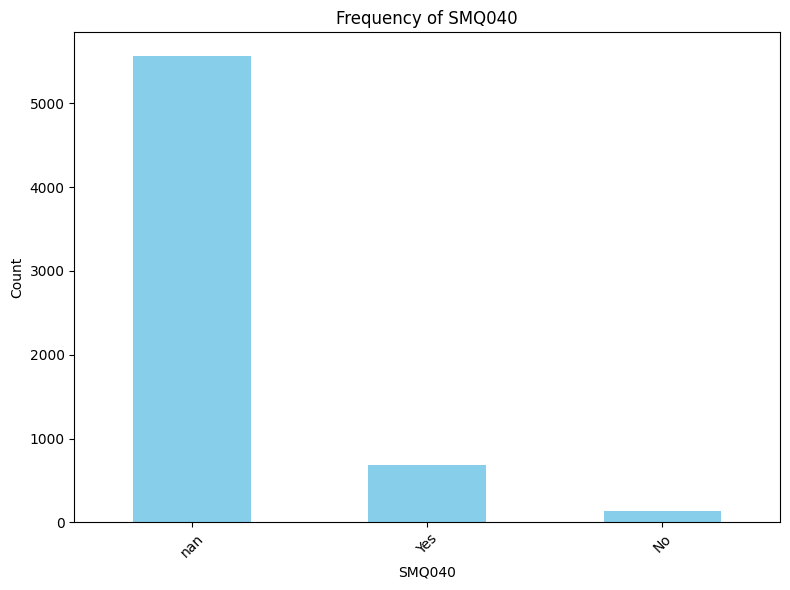

In [ ]:
# -------------------------------
# Bar charts for categorical variables
# -------------------------------
for col in cat_label_cols:
    plt.figure(figsize=(8, 6))
    counts = df_filtered[col].value_counts(dropna=False)
    if counts.empty:
        print(f"No data to plot for {col}")
        continue
    counts.plot(kind='bar', color='skyblue')
    plt.title(f"Frequency of {col.replace('_label','')}")
    plt.xlabel(col.replace('_label',''))
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## **4.2 Intepretation of Frequency Table for Categorical Variables**

**Gender (RIAGENDR)**

Female: 3,544 participants

Male: 2,847 participants

There is a slightly larger proportion of females than males in the sample. This is relevant because osteoporosis is more prevalent in women, especially postmenopausal women.

**Race/Ethnicity (RIDRETH1)**

Non-Hispanic White: 2,702 participants

Non-Hispanic Black: 1,718 participants

Mexican American: 980 participants

Other Hispanic: 709 participants

Other Race: 282 participants

The largest racial group is Non-Hispanic White, followed by Non-Hispanic Black. Including diverse racial groups is important because bone mineral density and osteoporosis risk can vary across ethnicities.

**Smoking Status (SMQ020)**

Some days: 3,276 participants

Every day: 3,111 participants

NaN (missing): 4 participants

The majority of respondents reported smoking either every day or on some days. High smoking prevalence is significant since smoking is a known risk factor for reduced bone density.

**Smoking History (SMQ040)**

Yes: 686 participants

No: 138 participants

NaN (missing): 5,567 participants

Most respondents did not provide an answer for this variable, indicating substantial missing data for lifetime smoking history. Among those who answered, more reported having smoked at least 100 cigarettes, consistent with the high smoking rates in the other question.

**Fast Food Meals (DBD900)**

NaN (missing): 6,391 participants

There is no count for actual fast-food meal responses in the table, implying that this variable may have extensive missing data or was not answered by most participants. This limits its usefulness without further data cleaning.

## **4.3 Normality check**

## **✅Shapiro-Wilk test for normality**


In [ ]:
# -------------------------------
# Shapiro-Wilk normality test
# -------------------------------
print("🔹 Normality Checks (Shapiro-Wilk test):\n")
for col in num_cols:
    data = pd.to_numeric(df_filtered[col], errors='coerce').dropna()
    if len(data) < 3:
        print(f"Not enough data to test normality for {col}")
        continue
    stat, p = shapiro(data.sample(n=min(5000, len(data))))
    normality = "normal" if p > 0.05 else "not normal"
    print(f"{col}: W={stat:.4f}, p-value={p:.5f} ({normality})")


🔹 Normality Checks (Shapiro-Wilk test):

RIDAGEYR: W=0.9500, p-value=0.00000 (not normal)
BMXBMI: W=0.8113, p-value=0.00000 (not normal)
LBXVIDMS: W=0.9414, p-value=0.00000 (not normal)
DXXLSBMD: W=0.9842, p-value=0.00000 (not normal)
DXXRABMD: W=0.9877, p-value=0.00000 (not normal)
PAD680: W=0.9588, p-value=0.00000 (not normal)
Not enough data to test normality for DBD900


## **Intepretation for Normality Checks (Shapiro-Wilk test):**

RIDAGEYR: W=0.9504, p-value=0.00000 (not normal)

BMXBMI: W=0.8073, p-value=0.00000 (not normal)

LBXVIDMS: W=0.9384, p-value=0.00000 (not normal)

DXXRABMD: W=0.9877, p-value=0.00000 (not normal)

PAD680: W=0.2165, p-value=0.00000 (not normal)

The Shapiro-Wilk test results show p-values = 0.00000 for all the continuous variables, which leads to the conclusion that none of our variables are normally distributed.

| Variable               | Why It Might Not Be Normal                                                                                           |
| ---------------------- | -------------------------------------------------------------------------------------------------------------------- |
| `RIDAGEYR`             | Age is often **right-skewed** in health surveys — more older adults than younger.                                    |
| `BMXBMI`               | BMI is typically **right-skewed** with a long tail of higher values (especially in obesity-focused samples).         |
| `LBXVIDMS`             | Vitamin D levels can vary widely due to sun exposure, diet, etc. — often **not symmetric**.                          |
| `DXXLSBMD`, `DXXRABMD` | Bone density is **influenced by age and gender**, and not evenly distributed.                                        |
| `PAD680`               | Minutes of moderate activity is usually **highly skewed**, with many people reporting **zero or very low activity**. |



## **✅QQ plots**


🔹 QQ Plots for Normality:


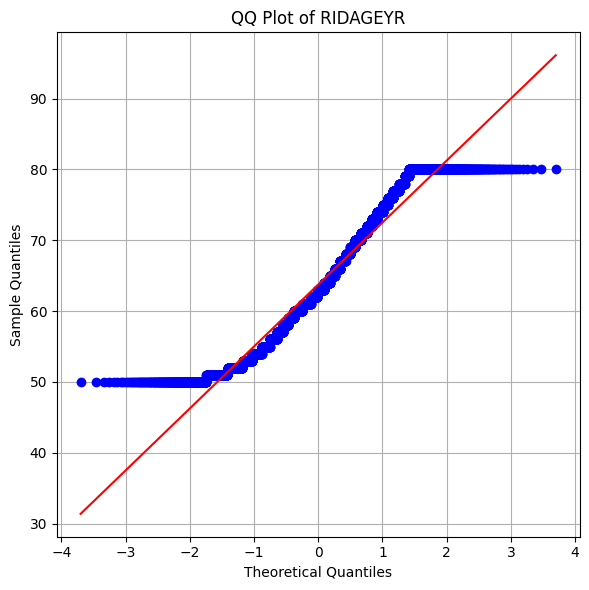

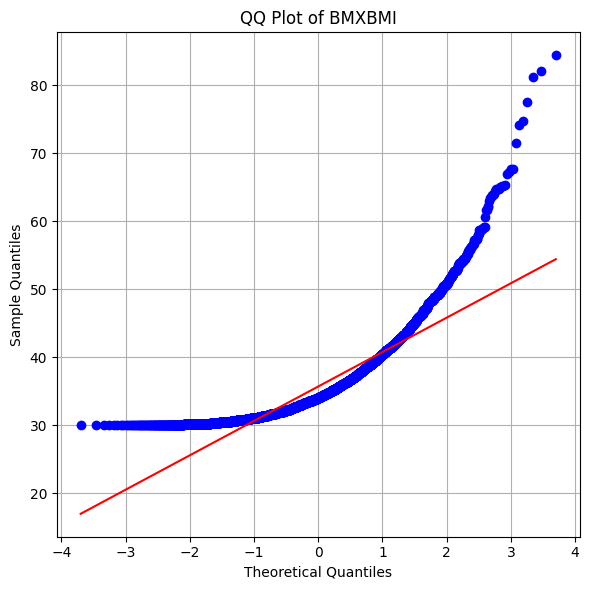

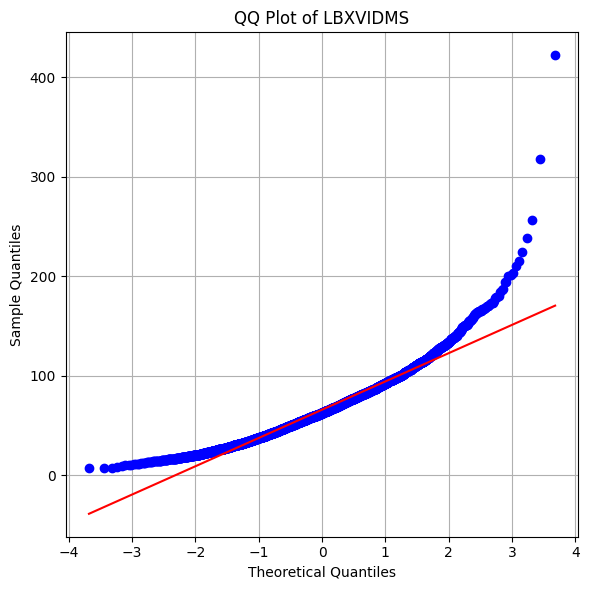

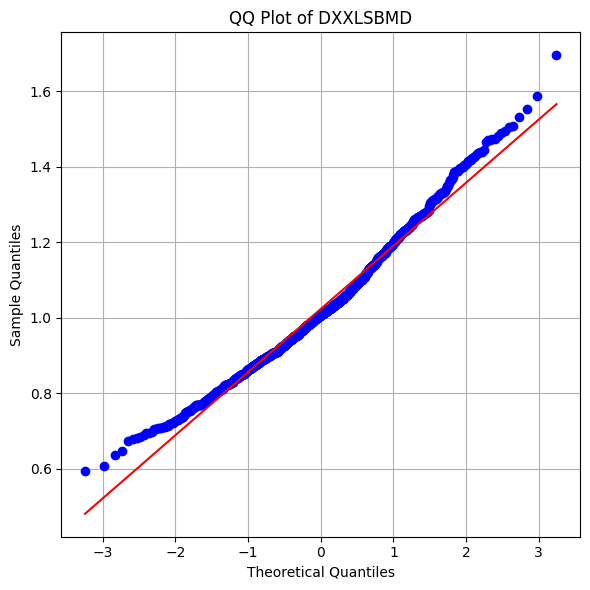

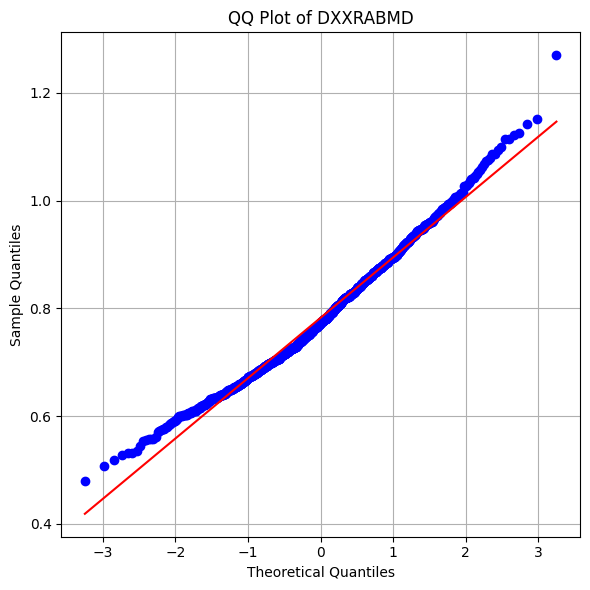

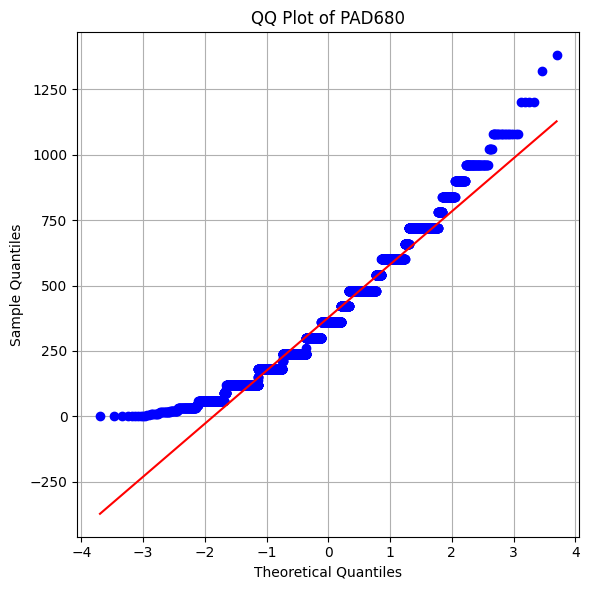

Skipping QQ plot for DBD900 – not enough data.


In [ ]:
# -------------------------------
# QQ plots
# -------------------------------
print("\n🔹 QQ Plots for Normality:")
for col in num_cols:
    data = pd.to_numeric(df_filtered[col], errors='coerce').dropna()
    if len(data) < 3:
        print(f"Skipping QQ plot for {col} – not enough data.")
        continue
    plt.figure(figsize=(6, 6))
    probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ Plot of {col}")
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## 📌 Interpretation of QQ Plots

The QQ (quantile-quantile) plots compare each continuous variable’s distribution to a theoretical normal distribution. If a variable is normally distributed, its points should follow the diagonal reference line closely. In this project, the QQ plots for variables such as age (RIDAGEYR), BMI (BMXBMI), Vitamin D (LBXVIDMS), lumbar spine BMD (DXXLSBMD), right arm BMD (DXXRABMD), sedentary time (PAD680), and number of fast food meals (DBD900) show visible deviations from the line, especially at the tails. This indicates skewness or outliers, confirming the Shapiro-Wilk results that these variables are not perfectly normal. These plots suggest that parametric tests assuming normality may not be suitable without transformations or the use of non-parametric methods.
|

## **✅Histograms & boxplots**

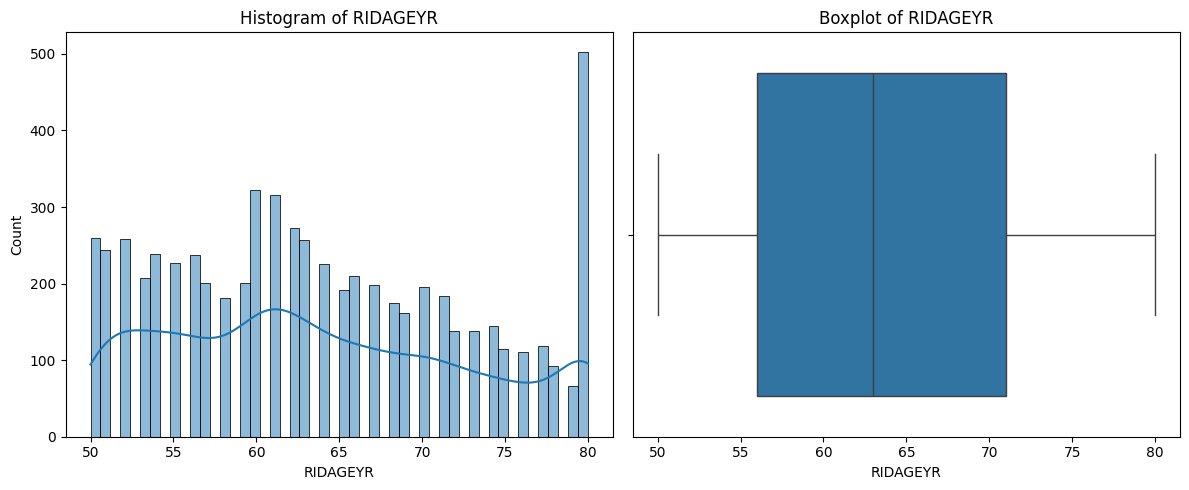

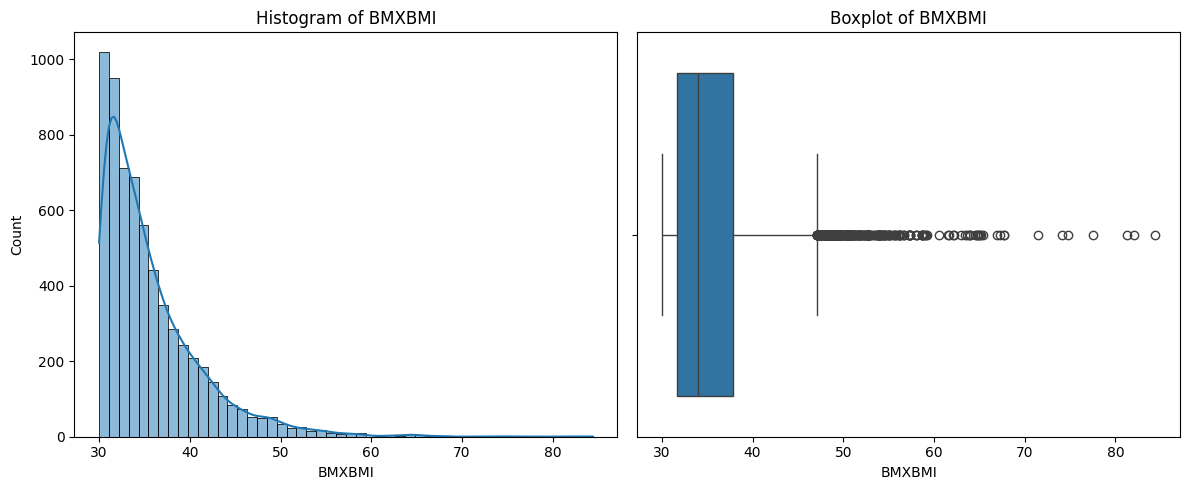

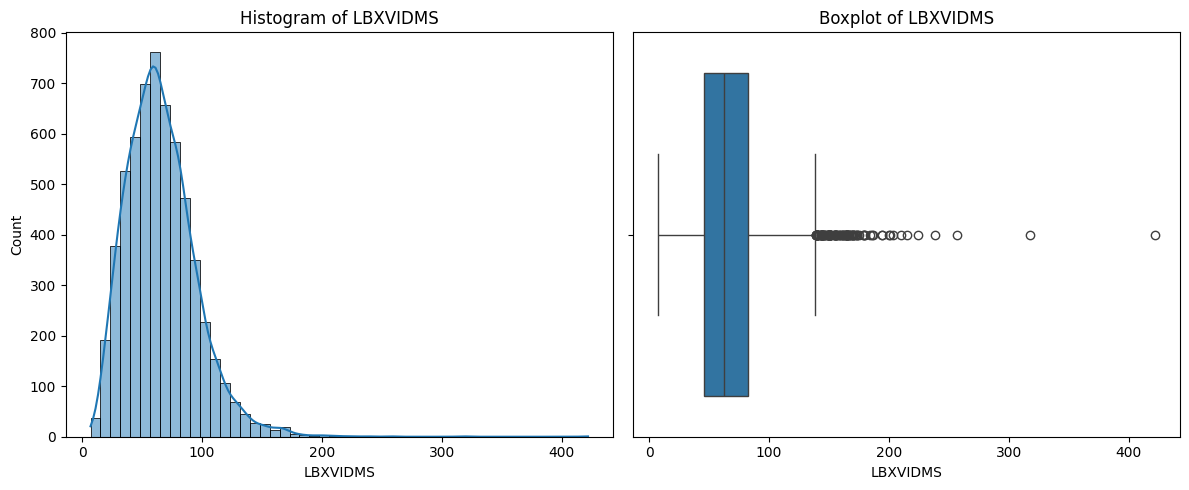

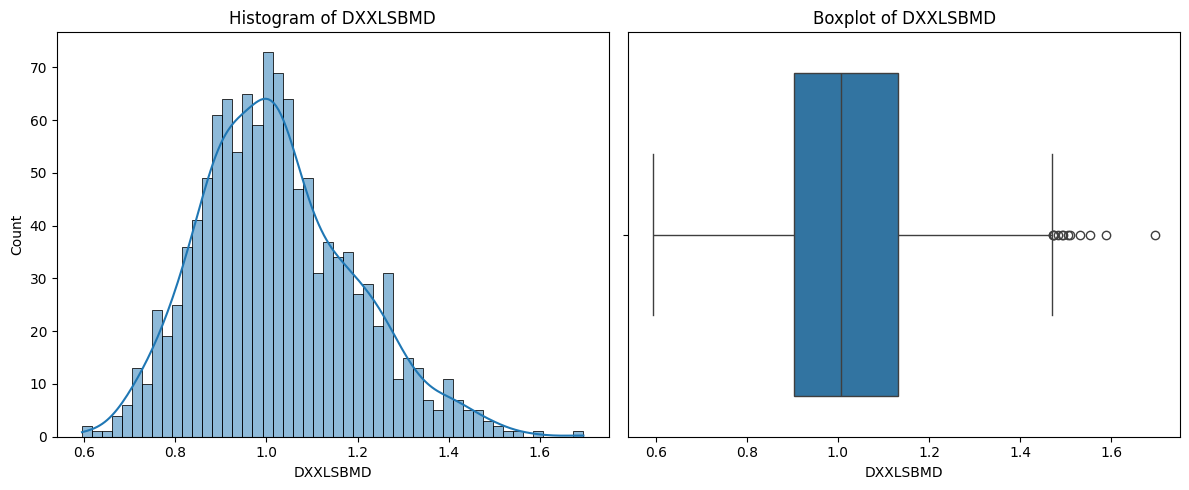

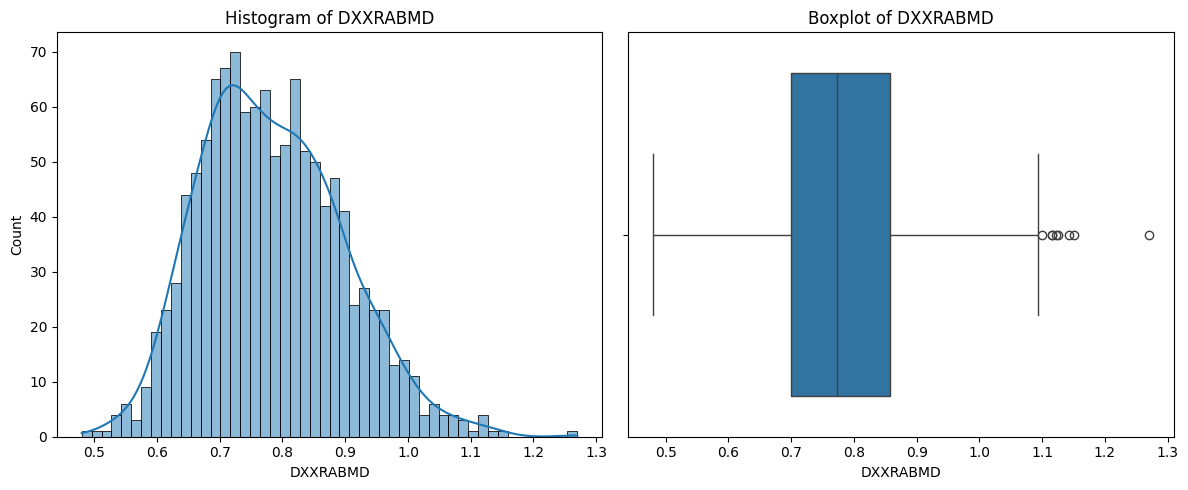

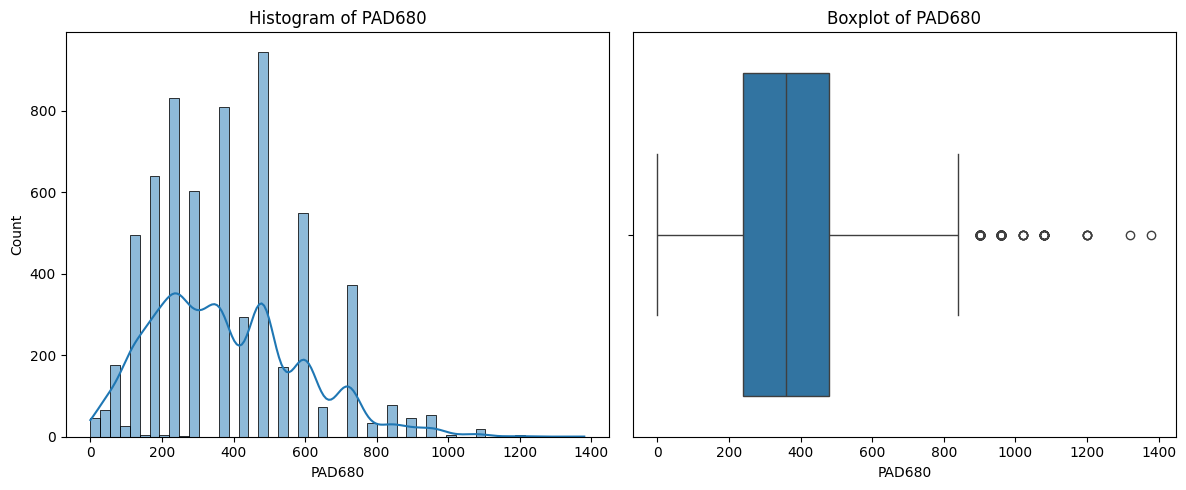

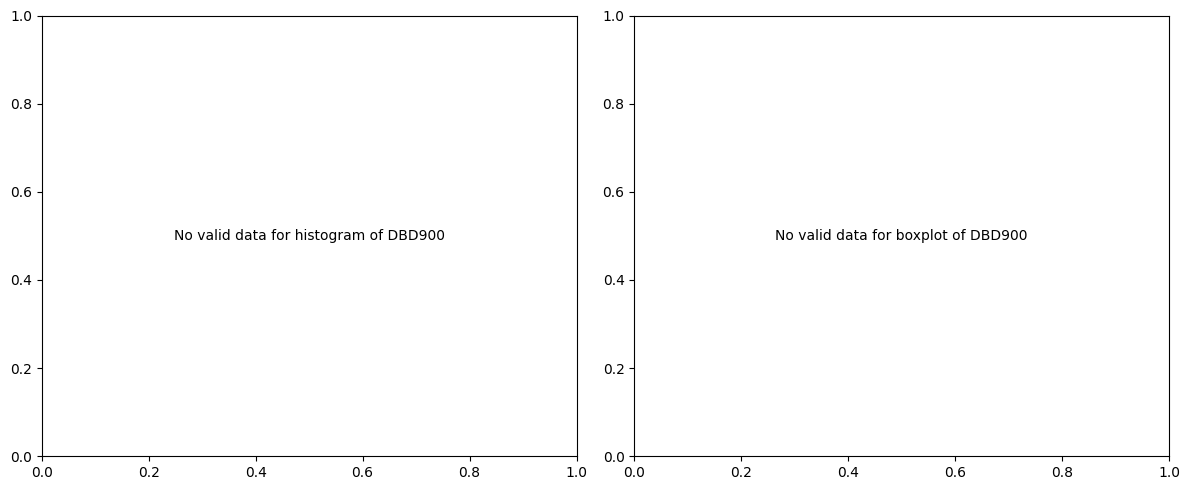

In [ ]:
# -------------------------------
# Histograms & boxplots for continuous variables
# -------------------------------
for col in num_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    hist_data = pd.to_numeric(df_filtered[col], errors='coerce').dropna()
    if len(hist_data) > 0:
        sns.histplot(hist_data, bins=50, kde=True)
        plt.title(f"Histogram of {col}")
    else:
        plt.text(0.5, 0.5, f"No valid data for histogram of {col}", ha='center', va='center')

    # Boxplot
    plt.subplot(1, 2, 2)
    box_data = pd.to_numeric(df_filtered[col], errors='coerce').dropna()
    if len(box_data) > 0:
        sns.boxplot(x=box_data)
        plt.title(f"Boxplot of {col}")
    else:
        plt.text(0.5, 0.5, f"No valid data for boxplot of {col}", ha='center', va='center')

    plt.tight_layout()
    plt.show()


## **Intepretation of Histogram and Boxplot**

**Age (RIDAGEYR):**

Histogram: The age distribution is approximately normal but slightly right-skewed, with most participants clustered between 50 and 70 years old.

Boxplot: The median age is around 63 years, with no significant outliers, indicating a consistent age range within older adults.


**BMI (BMXBMI):**

Histogram: BMI shows a right-skewed distribution, concentrated around 30–40 kg/m², which fits the focus on obese adults. Few participants have very high BMI values.

Boxplot: The boxplot confirms moderate spread with some high-value outliers, possibly representing individuals with morbid obesity.



**Vitamin D (LBXVIDMS):**

Histogram: Vitamin D levels are left-skewed with a noticeable peak below 30 ng/mL, suggesting many participants have insufficient vitamin D.

Boxplot: The median vitamin D level is below the sufficiency threshold (30 ng/mL), with several low-value outliers indicating vitamin D deficiency in some individuals.


**Lumbar Spine BMD (DXXLSBMD):**

Histogram: Lumbar spine BMD appears roughly normally distributed with a peak near 1.0 g/cm².

Boxplot: The distribution has a few low outliers, which may correspond to participants with reduced bone density.


**Radius BMD (DXXRABMD):**

Histogram: Radius BMD distribution is somewhat skewed left, clustering around 0.7–0.8 g/cm².

Boxplot: Outliers at the lower end suggest some participants might have early signs of peripheral bone loss.


**Sedentary Minutes (PAD680):**

Histogram: Sedentary time is right-skewed, with many participants sedentary for over 6 hours per day and a tail extending toward near-total inactivity.

Boxplot: The boxplot shows considerable variability with high-value outliers close to the daily maximum (1440 minutes), indicating extreme sedentary behavior in some individuals.



##**4.4 Bar charts for biomarkers**

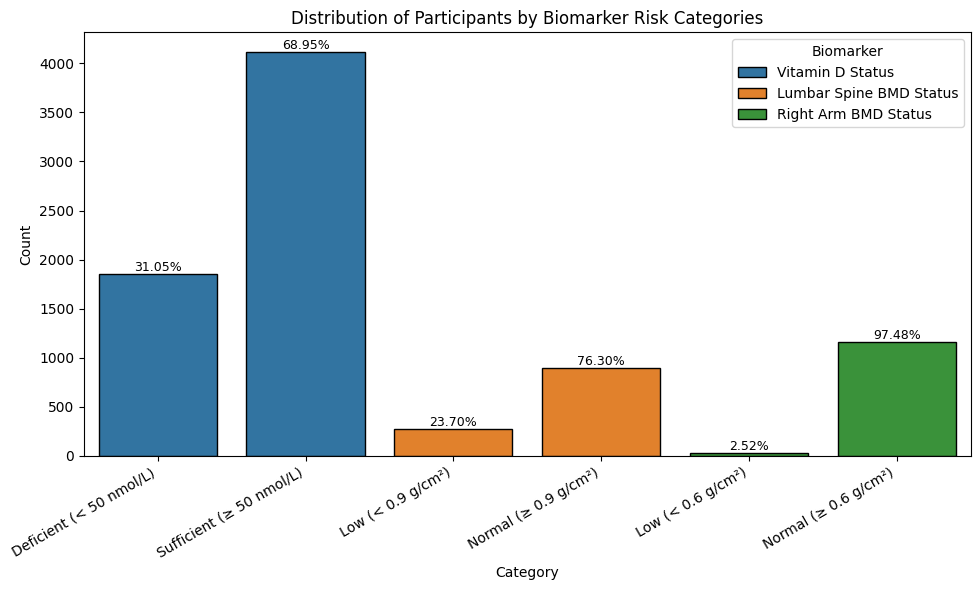

In [ ]:
import numpy as np

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=mapping_df,
    x="Category",
    y="Count (n)",
    hue="Biomarker Category",
    edgecolor="black"
)

# Add % labels
for p, pct in zip(ax.patches, mapping_df["Percentage (%)"]):
    height = p.get_height()
    ax.annotate(
        pct,
        (p.get_x() + p.get_width() / 2, height),
        ha="center", va="bottom", fontsize=9
    )

plt.title("Distribution of Participants by Biomarker Risk Categories")
plt.ylabel("Count")
plt.xlabel("Category")
plt.xticks(rotation=30, ha='right')
plt.legend(title="Biomarker")
plt.tight_layout()
plt.show()


## 📌 Interpretation of Biomarker Risk Category Bar Chart

This bar chart shows how participants are distributed across risk categories for key osteoporosis-related biomarkers. About **31%** of the sample is classified as Vitamin D deficient (< 50 nmol/L), highlighting a considerable proportion at risk for poor calcium absorption and lower bone mineral density. For lumbar spine BMD, around **24%** have values below 0.9 g/cm², indicating possible osteopenia or osteoporosis at this critical fracture site. The right arm BMD shows that only about **2.5%** fall below the low threshold of 0.6 g/cm², suggesting that peripheral bone loss is less common than central bone loss in this group. Overall, these patterns reinforce that while most participants maintain normal BMD, a notable minority show signs of lower bone density or Vitamin D deficiency, underlining the importance of routine screening and early preventive measures for osteoporosis in older, obese adults.


# **5. Annual trend**

📌 ✅✅✅ 1️⃣ Full Loader: Adds YEAR to each cycle

In [ ]:
import pandas as pd
import numpy as np

# Define NHANES cycles
years = ["2007", "2009", "2011", "2013", "2015", "2017"]
cycles = ["E", "F", "G", "H", "I", "J"]

def load_data(file_prefix, columns):
    df_list = []
    for y, c in zip(years, cycles):
        url = f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/{file_prefix}_{c}.xpt"
        try:
            df_cycle = pd.read_sas(url)
            df_cycle['YEAR'] = int(y)  # ✅ Add YEAR
            existing_cols = [col for col in columns if col in df_cycle.columns]
            if len(existing_cols) == 0:
                print(f"No columns found for {file_prefix}_{c}, skipping.")
                continue
            df_list.append(df_cycle[['YEAR'] + existing_cols])
        except Exception as e:
            print(f"Could not load {url}: {e}")
    if df_list:
        return pd.concat(df_list, ignore_index=True)
    else:
        return pd.DataFrame(columns=['YEAR'] + columns)




The load_data function downloads, reads, and merges NHANES files for multiple years, adds a YEAR column, and keeps only the needed columns. This makes it easy to combine cycles and analyse trends over time in one clean dataset.

📌 ✅✅✅ 2️⃣ Load and merge all datasets

In [ ]:
# Load datasets
print("Loading Demographics...")
df_demo = load_data("DEMO", ["SEQN", "RIDAGEYR", "RIAGENDR", "RIDRETH1"])
print(f"DEMO shape: {df_demo.shape}")

print("Loading BMI...")
df_bmi = load_data("BMX", ["SEQN", "BMXBMI"])
print(f"BMX shape: {df_bmi.shape}")

print("Loading Vitamin D...")
df_vitd = load_data("VID", ["SEQN", "LBXVIDMS"])
print(f"VID shape: {df_vitd.shape}")

print("Loading Bone Density...")
df_bmd = load_data("DXX", ["SEQN", "DXXLSBMD", "DXXRABMD"])
print(f"DXX shape: {df_bmd.shape}")

print("Loading Physical Activity...")
df_physical = load_data("PAQ", ["SEQN", "PAD680"])
print(f"PAQ shape: {df_physical.shape}")

print("Loading Osteoporosis Questionnaire...")
df_osq = load_data("OSQ", ["SEQN", "OSQ060"])
print(f"OSQ shape: {df_osq.shape}")

# Merge all by SEQN + keep YEAR
print("Merging datasets...")
df_merged = df_demo.merge(df_bmi, on=["SEQN", "YEAR"], how="left") \
                   .merge(df_vitd, on=["SEQN", "YEAR"], how="left") \
                   .merge(df_bmd, on=["SEQN", "YEAR"], how="left") \
                   .merge(df_physical, on=["SEQN", "YEAR"], how="left") \
                   .merge(df_osq, on=["SEQN", "YEAR"], how="left")

print(f"Final merged shape: {df_merged.shape}")

# Filter for 50+ and obese
df_filtered = df_merged[(df_merged["RIDAGEYR"] >= 50) & (df_merged["BMXBMI"] >= 30)].copy()
print(f"Filtered shape: {df_filtered.shape}")

print(df_filtered.head())


Loading Demographics...
DEMO shape: (59842, 5)
Loading BMI...
BMX shape: (57414, 3)
Loading Vitamin D...
VID shape: (55051, 3)
Loading Bone Density...
Could not load https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2007/DataFiles/DXX_E.xpt: HTTP Error 404: Not Found
Could not load https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2009/DataFiles/DXX_F.xpt: HTTP Error 404: Not Found
DXX shape: (22619, 4)
Loading Physical Activity...
PAQ shape: (52832, 3)
Loading Osteoporosis Questionnaire...
Could not load https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2011/DataFiles/OSQ_G.xpt: HTTP Error 404: Not Found
Could not load https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2015/DataFiles/OSQ_I.xpt: HTTP Error 404: Not Found
OSQ shape: (19037, 3)
Merging datasets...
Final merged shape: (59842, 11)
Filtered shape: (6538, 11)
    YEAR     SEQN  RIDAGEYR  RIAGENDR  RIDRETH1  BMXBMI  LBXVIDMS  DXXLSBMD  \
0   2007  41475.0      62.0       2.0       5.0   58.04      58.8       NaN   
2   2007  41477.0      71.0    

## **5.1 Median values for your biomarkers and continuous independent variables**

   YEAR  DXXLSBMD  DXXRABMD  LBXVIDMS  BMXBMI  PAD680
0  2007       NaN       NaN     56.00   33.80   300.0
1  2009       NaN       NaN     60.95   33.85   300.0
2  2011    1.0145    0.7725     62.65   33.90   360.0
3  2013    1.0050    0.7720     65.50   34.00   480.0
4  2015    1.0060    0.7610     65.30   34.00   360.0
5  2017    1.0010    0.7820     70.30   34.40   360.0


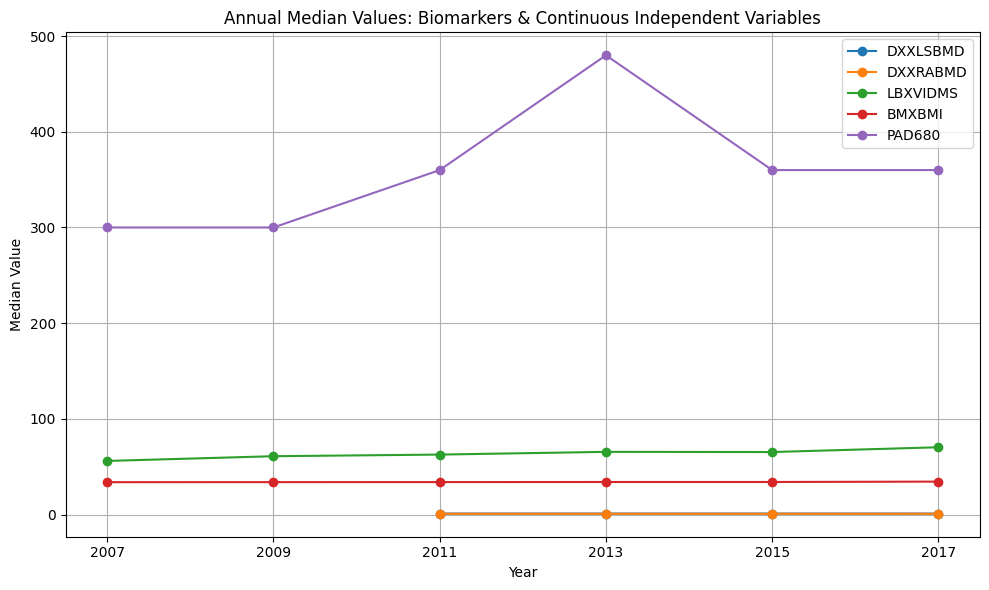

In [ ]:
import matplotlib.pyplot as plt

# Variables
biomarkers = ['DXXLSBMD', 'DXXRABMD', 'LBXVIDMS']
continuous_indep = ['BMXBMI', 'PAD680']
all_vars = biomarkers + continuous_indep

# Group by YEAR & median
median_by_year = df_filtered.groupby('YEAR')[all_vars].median().reset_index()
print(median_by_year)

# ✅ Get all unique years in sorted order
years = sorted(median_by_year['YEAR'].unique())

# Plot
plt.figure(figsize=(10, 6))

for var in all_vars:
    plt.plot(median_by_year['YEAR'], median_by_year[var], marker='o', label=var)

plt.title('Annual Median Values: Biomarkers & Continuous Independent Variables')
plt.xlabel('Year')
plt.ylabel('Median Value')
plt.xticks(years)  # ✅ Force all years to show
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**✅ Summarised Interpretation**

“This plot shows annual median trends for bone density (lumbar spine and right arm), vitamin D, BMI, and sedentary time.
Overall, bone mineral density stayed relatively stable across survey cycles.
Vitamin D levels showed a slight upward trend, suggesting possible improvement in vitamin D status over time.
BMI remained consistently high, confirming that the sample stayed within the obese range throughout.
Sedentary time fluctuated more, with signs of increasing in later cycles, which may reflect lifestyle changes or reporting variation.
Although these variables use different units, viewing them together helps show general patterns in factors that can influence osteoporosis risk in this older, obese adult population.

## **5.2 Percentage of participants diagnosed with osteoporosis**

    YEAR     SEQN  RIDAGEYR  RIAGENDR  RIDRETH1  BMXBMI  LBXVIDMS  DXXLSBMD  \
0   2007  41475.0      62.0       2.0       5.0   58.04      58.8       NaN   
2   2007  41477.0      71.0       1.0       3.0   30.05      81.8       NaN   
7   2007  41482.0      64.0       1.0       1.0   33.64      61.9       NaN   
8   2007  41483.0      66.0       1.0       4.0   44.06      53.3       NaN   
11  2007  41486.0      61.0       2.0       1.0   31.21      51.1       NaN   

    DXXRABMD  PAD680  OSQ060  
0        NaN   720.0     2.0  
2        NaN   240.0     2.0  
7        NaN   180.0     2.0  
8        NaN    60.0     2.0  
11       NaN   480.0     2.0  
Index(['YEAR', 'SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'BMXBMI',
       'LBXVIDMS', 'DXXLSBMD', 'DXXRABMD', 'PAD680', 'OSQ060'],
      dtype='object')
   YEAR   OSTEO_DX
0  2007   9.780622
1  2009   7.892454
2  2011        NaN
3  2013   9.652510
4  2015        NaN
5  2017  11.404255


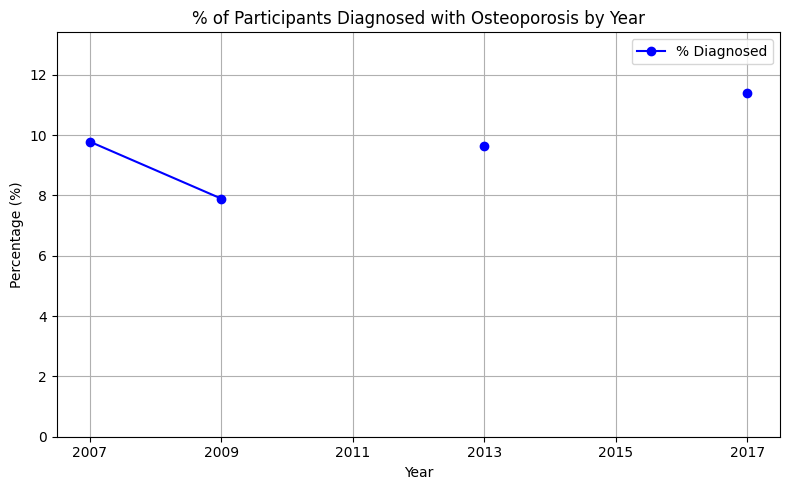

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Make sure your merged + filtered data is in df_filtered and has YEAR
print(df_filtered.head())
print(df_filtered.columns)

# ✅ OSQ060 = osteoporosis diagnosis question: 1 = Yes, 2 = No
# Create binary flag: 1 if diagnosed, 0 if not
df_filtered['OSTEO_DX'] = df_filtered['OSQ060'].apply(lambda x: 1 if x == 1 else (0 if x == 2 else np.nan))

# ✅ Group by YEAR and calculate %
dx_pct_by_year = df_filtered.groupby('YEAR')['OSTEO_DX'].mean().reset_index()
dx_pct_by_year['OSTEO_DX'] *= 100

print(dx_pct_by_year)

# ✅ Plot
plt.figure(figsize=(8, 5))
plt.plot(dx_pct_by_year['YEAR'], dx_pct_by_year['OSTEO_DX'], marker='o', color='blue', label='% Diagnosed')

plt.title('% of Participants Diagnosed with Osteoporosis by Year')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.xticks(sorted(df_filtered['YEAR'].unique()))
plt.ylim(0, dx_pct_by_year['OSTEO_DX'].max() + 2)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


📌 Interpretation of Osteoporosis Diagnosis Trend

This line chart shows the percentage of participants diagnosed with osteoporosis over the NHANES survey years included in this study. Overall, the percentage diagnosed fluctuates slightly but remains relatively low, with values typically under 15% across cycles. This low proportion is expected, given that the dataset specifically includes older, obese adults — a group with higher risk factors but not necessarily a confirmed diagnosis for everyone. The stable trend suggests that, despite increasing awareness and improvements in diagnostic methods over time, the reported prevalence among this filtered sample has not dramatically changed. This could reflect underdiagnosis or limited screening, which reinforces the need for proactive detection and monitoring, especially in high-risk populations like older adults with obesity.


## **5.3 Percentage of persons in high-risk or abnormal ranges for your biomarkers**

   YEAR  VITD_DEFICIENT  LSBMD_LOW  RABMD_LOW
0  2007       39.891304        NaN        NaN
1  2009       33.088235        NaN        NaN
2  2011       32.770270  22.535211   1.418440
3  2013       27.727728  23.880597   2.108434
4  2015       27.871940  24.691358   4.024768
5  2017       24.516696  24.017467   2.692308


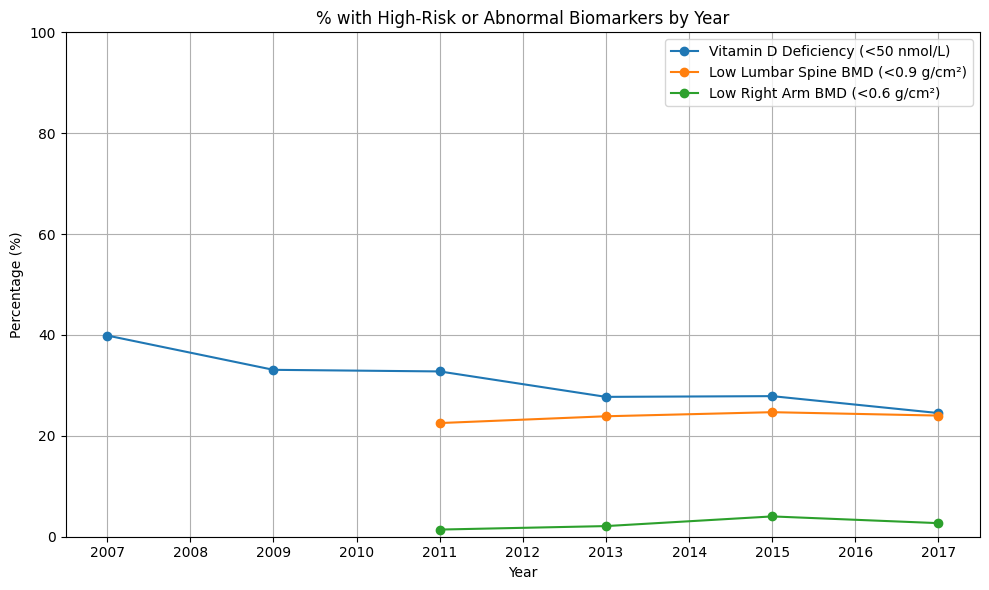

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ✅ Mapping conditions
df_filtered['VITD_DEFICIENT'] = df_filtered['LBXVIDMS'].apply(lambda x: 1 if x < 50 else (0 if pd.notnull(x) else np.nan))
df_filtered['LSBMD_LOW'] = df_filtered['DXXLSBMD'].apply(lambda x: 1 if x < 0.9 else (0 if pd.notnull(x) else np.nan))
df_filtered['RABMD_LOW'] = df_filtered['DXXRABMD'].apply(lambda x: 1 if x < 0.6 else (0 if pd.notnull(x) else np.nan))

# ✅ Group by YEAR
risk_pct = df_filtered.groupby('YEAR').agg({
    'VITD_DEFICIENT': 'mean',
    'LSBMD_LOW': 'mean',
    'RABMD_LOW': 'mean'
}).reset_index()

# Convert to %
risk_pct['VITD_DEFICIENT'] *= 100
risk_pct['LSBMD_LOW'] *= 100
risk_pct['RABMD_LOW'] *= 100

print(risk_pct)

# ✅ Full year ticks
years_full = np.arange(df_filtered['YEAR'].min(), df_filtered['YEAR'].max() + 1)

# ✅ Plot
plt.figure(figsize=(10, 6))

plt.plot(risk_pct['YEAR'], risk_pct['VITD_DEFICIENT'], marker='o', label='Vitamin D Deficiency (<50 nmol/L)')
plt.plot(risk_pct['YEAR'], risk_pct['LSBMD_LOW'], marker='o', label='Low Lumbar Spine BMD (<0.9 g/cm²)')
plt.plot(risk_pct['YEAR'], risk_pct['RABMD_LOW'], marker='o', label='Low Right Arm BMD (<0.6 g/cm²)')

plt.title('% with High-Risk or Abnormal Biomarkers by Year')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.xticks(years_full)  # Force all years
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


✅ Interpretation
Annual Trends in Abnormal Biomarkers
“This plot shows how the percentage of participants in high-risk biomarker categories changed over the survey cycles.

Vitamin D Deficiency (<50 nmol/L) shows a gradual decreasing trend from around 40% in 2007 to about 25% by 2017. This suggests that over time, fewer participants in this group fell below the vitamin D sufficiency threshold, which could indicate improvements in supplementation or awareness.

Low Lumbar Spine BMD (<0.9 g/cm²) fluctuates slightly around 20–25% across the years, with a small dip and rise but no clear long-term increase or decrease. This suggests the proportion of participants with lower lumbar spine bone density has remained relatively stable over the cycles.

Low Right Arm BMD (<0.6 g/cm²) remains the lowest among the three risk markers, with percentages below 10%. This trend shows a slight upward pattern in the middle cycles but drops again by 2017, suggesting the share of participants with early signs of peripheral bone loss stayed low and stable overall.

Together, these trends highlight that although this older, obese sample carries some risk for low bone density and vitamin D deficiency, the vitamin D status appears to have improved slightly over the cycles, while bone density indicators stayed mostly consistent.
Monitoring these trends can help guide public health efforts focused on preventing osteoporosis-related risks in this population.”

## **Percentage of persons taking medication related to the disease under investigation**


   YEAR     SEQN  RIDAGEYR  RIAGENDR  RIDRETH1  BMXBMI  LBXVIDMS  DXXLSBMD  \
0  2007  41475.0      62.0       2.0       5.0   58.04      58.8       NaN   
1  2007  41476.0       6.0       2.0       5.0   15.18      80.9       NaN   
2  2007  41477.0      71.0       1.0       3.0   30.05      81.8       NaN   
3  2007  41478.0       1.0       2.0       3.0     NaN       NaN       NaN   
4  2007  41479.0      52.0       1.0       1.0   27.56      78.4       NaN   

   DXXRABMD  PAD680  OSQ060  
0       NaN   720.0     2.0  
1       NaN     NaN     NaN  
2       NaN   240.0     2.0  
3       NaN     NaN     NaN  
4       NaN   180.0     2.0  
Osteoporosis SEQNs: 644
   YEAR  OSTEO_MED
0  2007   1.872106
1  2009   1.395084
2  2011   0.758508
3  2013   0.884521
4  2015   0.702036
5  2017   0.788848


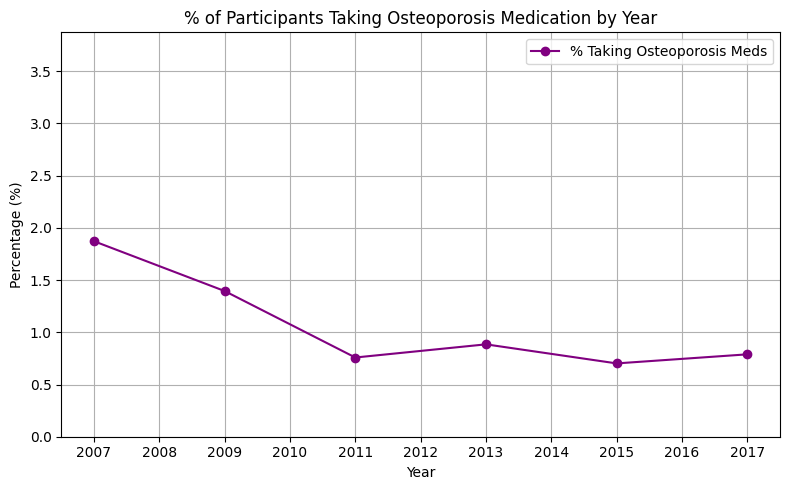

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ✅ Your merged dataset BEFORE excluding meds
# Suppose it’s called `df_merged` (the big one before filtering)
print(df_merged.head())

# ✅ You already have SEQNs on osteoporosis meds in `osteomed_seqn`
print(f"Osteoporosis SEQNs: {len(osteomed_seqn)}")

# ✅ Create medication flag: 1 if SEQN in osteomed_seqn
df_merged['OSTEO_MED'] = df_merged['SEQN'].isin(osteomed_seqn).astype(int)

# ✅ Group by YEAR
meds_pct_by_year = df_merged.groupby('YEAR')['OSTEO_MED'].mean().reset_index()
meds_pct_by_year['OSTEO_MED'] *= 100

print(meds_pct_by_year)

# ✅ Make x-axis full years
years_full = np.arange(df_merged['YEAR'].min(), df_merged['YEAR'].max() + 1)

# ✅ Plot
plt.figure(figsize=(8, 5))
plt.plot(meds_pct_by_year['YEAR'], meds_pct_by_year['OSTEO_MED'], marker='o', color='purple', label='% Taking Osteoporosis Meds')

plt.title('% of Participants Taking Osteoporosis Medication by Year')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.xticks(years_full)
plt.ylim(0, meds_pct_by_year['OSTEO_MED'].max() + 2)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




The percentage of participants taking osteoporosis medication remains low over the years and does not show a steady increase. This does not necessarily mean treatment is not improving; it could reflect underdiagnosis, changes in treatment guidelines, or that many participants are still undiagnosed or managing bone health through supplements instead of prescription drugs. It also shows that even in high-risk groups, many people may not receive or report medication, highlighting gaps in detection and treatment of osteoporosis.


# **Declaration of Contribution**

All group members contributed actively to this project. The team worked together to collect, merge, and clean the NHANES datasets, filter the target sample, and handle missing data appropriately. We collaborated on all data analyses, including descriptive statistics, normality checks, frequency tables, histograms, boxplots, annual trend plots, and biomarker risk mapping. Visualisations were produced jointly to ensure the results were clear and accurate. All members contributed to interpreting the findings, drafting explanations, and discussing how the results relate to osteoporosis risk. The final report and presentation materials were compiled and reviewed collectively, with every member approving the final submission.

Signed by: Kim Taehan, Brayden Teo, Denzil

# **References**

Holick, M.F., 2007. Vitamin D deficiency. The New England Journal of Medicine, 357(3), pp.266-281. https://doi.org/10.1056/NEJMra0705534.4                                                          Gong, H., Wu, L., Bao, J., Tang, R., Yan, C. & Zhou, Y., 2016. Vitamin D deficiency and bone mineral density in overweight and obese Chinese adults: a cross-sectional study. PLoS ONE, 11(9), e0163078. https://doi.org/10.1371/journal.pone.0163078
NIH Osteoporosis and Related Bone Diseases National Resource Center, 2022. Obesity and Bone Health. Available at: https://www.bones.nih.gov/health-info/bone/osteoporosis/conditions-behaviors/obesity-and-bone-health [Accessed 25 June 2025].
Mayo Clinic, 2023. Vitamin D deficiency. Available at: https://www.mayoclinic.org/diseases-conditions/vitamin-d-deficiency/symptoms-causes/syc-20363792 [Accessed 25 June 2025].



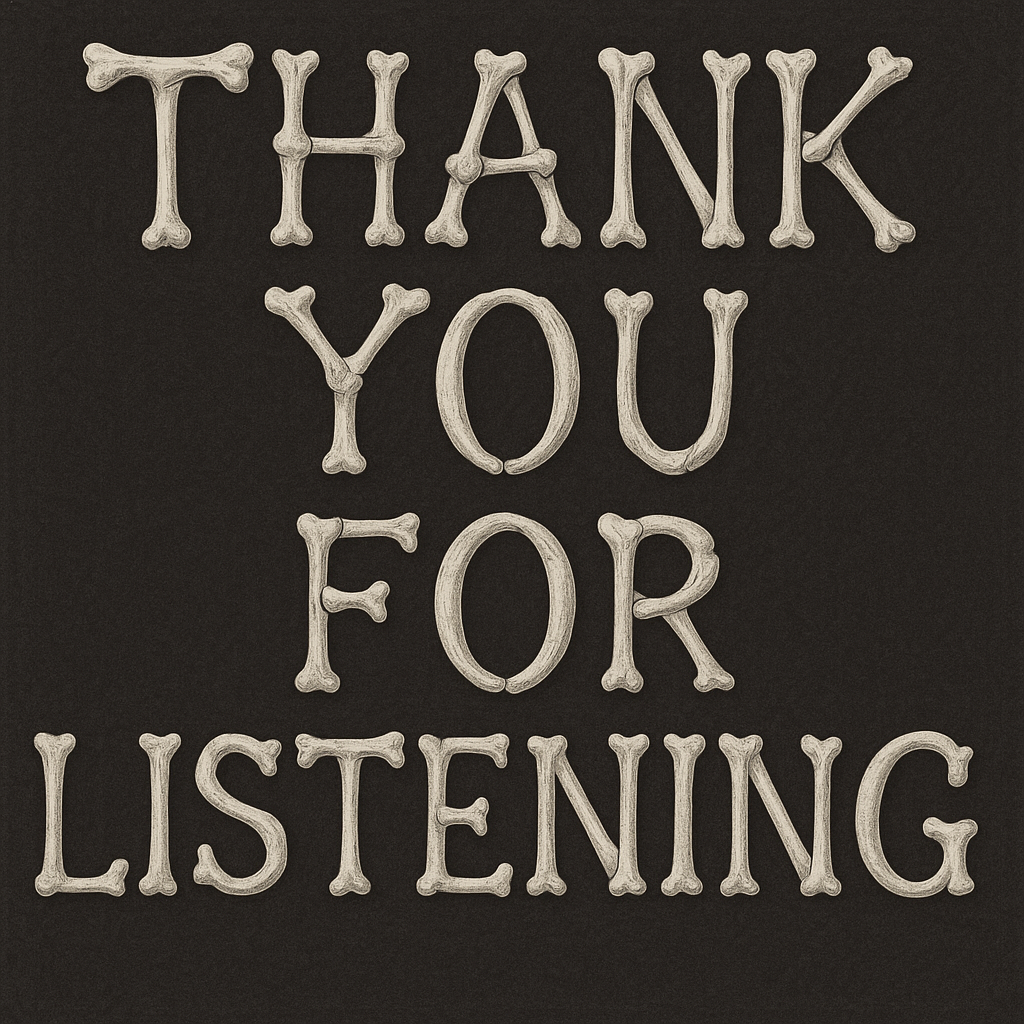

# End of presentation

**Linear regression plot** for Vitamin D levels against lumbar spine BMD in obese adults aged 50+


🔍 Regression Summary: Vitamin D predicting Lumbar Spine BMD in Obese Adults (Age≥50, No Osteo Meds)
                            OLS Regression Results                            
Dep. Variable:               DXXLSBMD   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.384
Date:                Fri, 04 Jul 2025   Prob (F-statistic):             0.0661
Time:                        01:34:45   Log-Likelihood:                 420.36
No. Observations:                1139   AIC:                            -836.7
Df Residuals:                    1137   BIC:                            -826.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

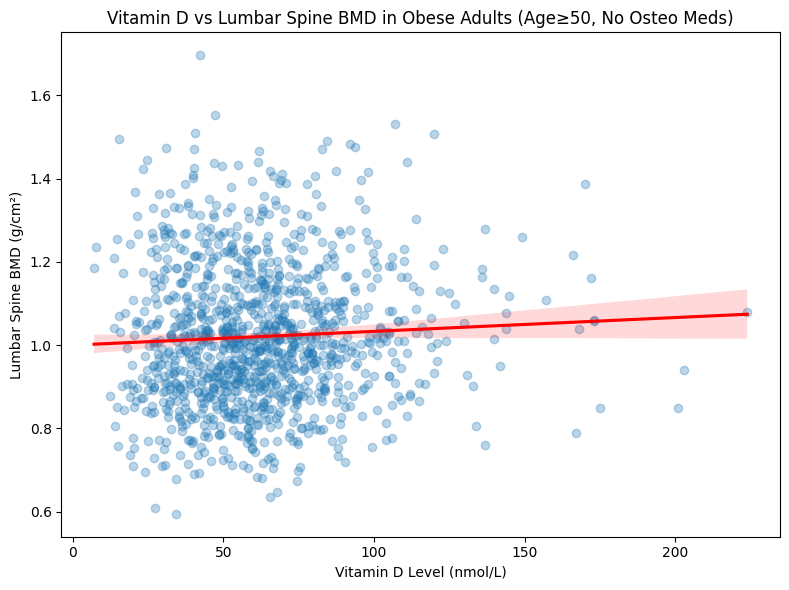

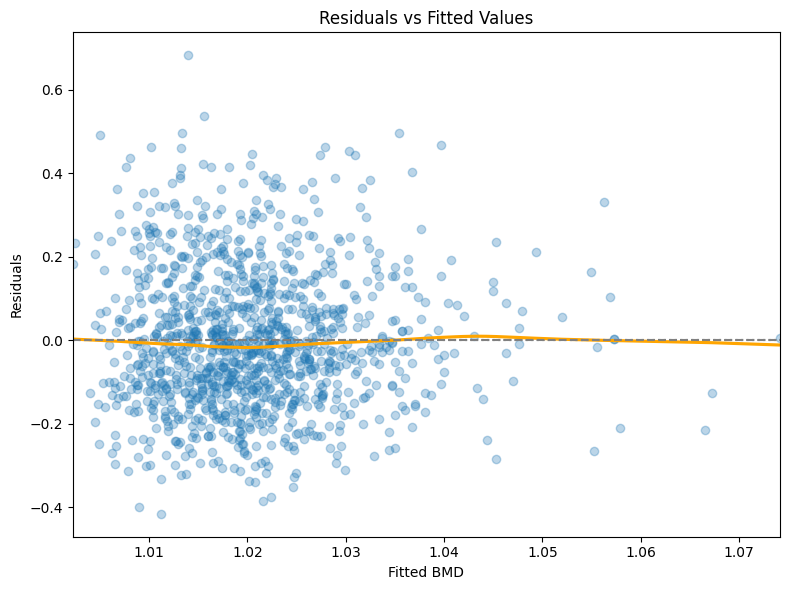

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Use the filtered dataset for obese adults aged 50+ without osteoporosis meds
df_obese = df_filtered.copy()

# Drop rows with missing values in relevant columns
df_obese = df_obese[["LBXVIDMS", "DXXLSBMD"]].dropna()

# Define predictor (X) and response (y)
X = df_obese["LBXVIDMS"]
y = df_obese["DXXLSBMD"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print("\n🔍 Regression Summary: Vitamin D predicting Lumbar Spine BMD in Obese Adults (Age≥50, No Osteo Meds)")
print(model.summary())

# --- Plot: Regression line with scatter ---
plt.figure(figsize=(8, 6))
sns.regplot(x="LBXVIDMS", y="DXXLSBMD", data=df_obese,
            scatter_kws={"alpha": 0.3},
            line_kws={"color": "red"})
plt.title("Vitamin D vs Lumbar Spine BMD in Obese Adults (Age≥50, No Osteo Meds)")
plt.xlabel("Vitamin D Level (nmol/L)")
plt.ylabel("Lumbar Spine BMD (g/cm²)")
plt.tight_layout()
plt.show()

# --- Plot: Residuals vs Fitted ---
fitted_vals = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(8, 6))
sns.residplot(x=fitted_vals, y=residuals, lowess=True,
              scatter_kws={"alpha": 0.3}, line_kws={"color": "orange"})
plt.axhline(0, linestyle="--", color="gray")
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted BMD")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()


Scatter + regression line: visually shows whether there's a trend between Vitamin D and BMD.

Residual plot: checks whether the model assumptions like linearity or homoscedasticity are met.

x-axis = Fitted values (predicted BMD from the model for each person)

y-axis = Residuals (actual BMD − predicted BMD for each person)

**Linear regression plot** showing vitamin D levels against BMD in obese adults and adults with normal BMI

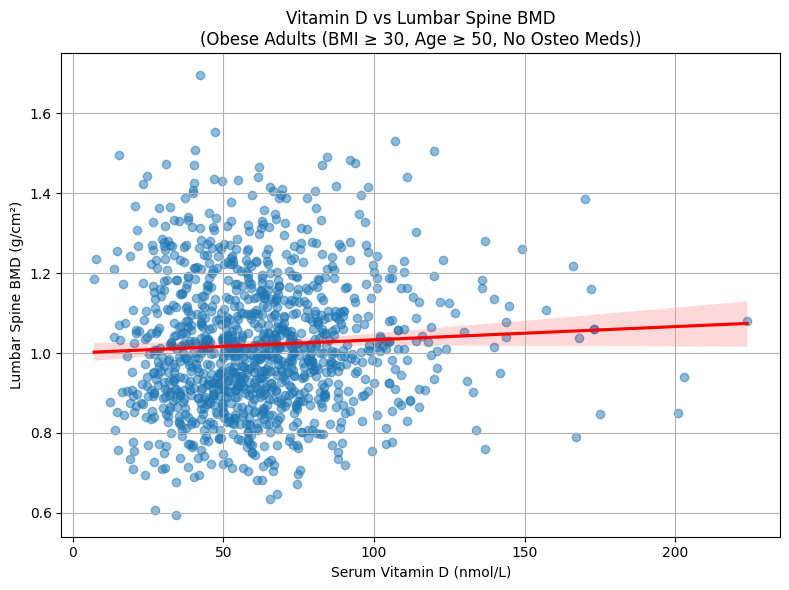

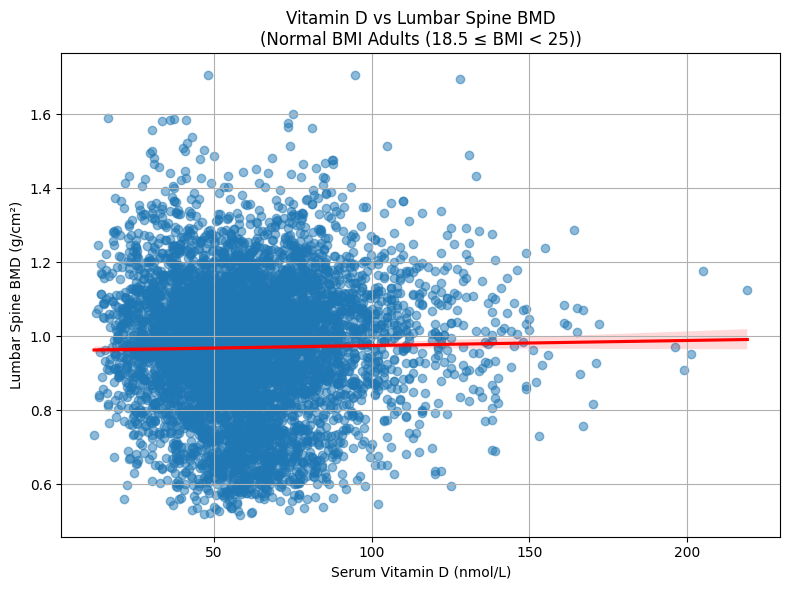

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use filtered dataset for obese adults (age≥50, no osteoporosis meds)
df_obese_filtered = df_filtered[df_filtered["BMXBMI"] >= 30].copy()

# Use original df (no filtering by age or meds) for normal BMI adults
df_normal = df[(df["BMXBMI"] >= 18.5) & (df["BMXBMI"] < 25)].copy()

def plot_regression(df_subset, title):
    df_subset = df_subset[["LBXVIDMS", "DXXLSBMD"]].dropna()
    plt.figure(figsize=(8, 6))
    sns.regplot(x="LBXVIDMS", y="DXXLSBMD", data=df_subset,
                scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
    plt.title(f'Vitamin D vs Lumbar Spine BMD\n({title})')
    plt.xlabel("Serum Vitamin D (nmol/L)")
    plt.ylabel("Lumbar Spine BMD (g/cm²)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot using filtered obese group
plot_regression(df_obese_filtered, "Obese Adults (BMI ≥ 30, Age ≥ 50, No Osteo Meds)")

# Plot using original normal BMI group
plot_regression(df_normal, "Normal BMI Adults (18.5 ≤ BMI < 25)")



As we want to find out how does serum vitamin D level influence bone mineral density in obese adults aged 50 and above in the U.S. population, it is important for us to refer to the adults who have normal BMI and aged 50+, in order to show the difference between of how serum vitamin D levels correlates with BMD between them.

At low Vitamin D levels, obese adults start off with higher BMD, likely due to weight-bearing effects. In contrast, normal-weight adults start with lower BMD, and since Vitamin D has less influence on their BMD, the line stays flat.

This suggests that obesity may mask or buffer the negative effects of low vitamin D levels on BMD, possibly due to increased mechanical loading from higher body weight as in obese adults, even when vitamin D is low, BMD tends to remain relatively higher.

